# Building yolo8 object detection pretrained model on top of the chosen dataset from robo flow

## Install & Importing Packages

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.2/881.2 kB 54.0 MB/s eta 0:00:00


In [3]:
pip install torch torchvision torchaudio

In [3]:
# importing YOLO
from ultralytics import YOLO

## Y8 - Data Processing And Model Training

In [8]:
# loading a pre-trained model

model = YOLO('yolov8n.pt')

100%|██████████| 6.25M/6.25M [00:00<00:00, 288MB/s]


In [5]:
!nvidia-smi

Wed Nov  6 13:13:53 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0              48W / 400W |      2MiB / 40960MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

In [11]:
# train the model

train_results = model.train(
    data = "/content/drive/MyDrive/Colab Notebooks/yolov8/Dataset/data.yaml",
    epochs = 20,
    imgsz = (320, 640),
    device = 'cuda:0',
    lr0 = 0.02,
    lrf = 0.02
)

Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/Colab Notebooks/yolov8/Dataset/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=(320, 640), save=True, save_period=-1, cache=False, device=cuda:0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, sa

100%|██████████| 755k/755k [00:00<00:00, 135MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 304MB/s]


AMP: checks passed ✅
WARNING ⚠️ updating to 'imgsz=640'. 'train' and 'val' imgsz must be an integer, while 'predict' and 'export' imgsz may be a [h, w] list or an integer, i.e. 'yolo export imgsz=640,480' or 'yolo export imgsz=640'


train: Scanning /content/drive/MyDrive/Colab Notebooks/yolov8/Dataset/train/labels... 3131 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3131/3131 [05:27<00:00,  9.55it/s]


train: New cache created: /content/drive/MyDrive/Colab Notebooks/yolov8/Dataset/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/MyDrive/Colab Notebooks/yolov8/Dataset/valid/labels... 261 images, 0 backgrounds, 0 corrupt: 100%|██████████| 261/261 [00:24<00:00, 10.69it/s]


val: New cache created: /content/drive/MyDrive/Colab Notebooks/yolov8/Dataset/valid/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.02' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      2.26G     0.8637        1.7      1.413         24        640: 100%|██████████| 196/196 [00:23<00:00,  8.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.24it/s]

                   all        261        267      0.439      0.542      0.384       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.21G      0.889      1.207       1.42         29        640: 100%|██████████| 196/196 [00:20<00:00,  9.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.03it/s]


                   all        261        267      0.377      0.549      0.339      0.174

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      2.21G     0.8838      1.039      1.418         25        640: 100%|██████████| 196/196 [00:19<00:00,  9.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.29it/s]

                   all        261        267      0.528      0.546       0.51       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20       2.2G     0.8486     0.9285      1.376         31        640: 100%|██████████| 196/196 [00:19<00:00,  9.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.48it/s]

                   all        261        267      0.702      0.611      0.629      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20       2.2G     0.8106     0.8427      1.355         33        640: 100%|██████████| 196/196 [00:19<00:00,  9.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.03it/s]


                   all        261        267      0.799        0.5      0.601      0.344

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20       2.2G     0.7871     0.7929      1.337         27        640: 100%|██████████| 196/196 [00:19<00:00,  9.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.66it/s]

                   all        261        267      0.655      0.694      0.662       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20       2.2G     0.7469     0.7398      1.306         32        640: 100%|██████████| 196/196 [00:19<00:00,  9.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.09it/s]

                   all        261        267      0.712      0.616      0.685      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20       2.2G     0.7283     0.6891      1.286         29        640: 100%|██████████| 196/196 [00:20<00:00,  9.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.98it/s]

                   all        261        267      0.791      0.746      0.813      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20       2.2G     0.6934     0.6573      1.269         37        640: 100%|██████████| 196/196 [00:19<00:00,  9.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.31it/s]


                   all        261        267      0.787      0.682      0.772      0.461

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20       2.2G     0.6854     0.6409      1.253         32        640: 100%|██████████| 196/196 [00:20<00:00,  9.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.28it/s]


                   all        261        267      0.806       0.73      0.792      0.504
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      2.21G     0.6022     0.5112      1.315         11        640: 100%|██████████| 196/196 [00:20<00:00,  9.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.76it/s]

                   all        261        267      0.804       0.75      0.805      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20       2.2G     0.5811     0.4329      1.284         13        640: 100%|██████████| 196/196 [00:19<00:00, 10.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.46it/s]

                   all        261        267      0.867      0.769      0.858      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20       2.2G       0.55     0.4051      1.258         11        640: 100%|██████████| 196/196 [00:19<00:00, 10.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.70it/s]


                   all        261        267       0.75      0.709       0.79      0.514

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20       2.2G     0.5249     0.3773      1.237         11        640: 100%|██████████| 196/196 [00:19<00:00, 10.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.71it/s]

                   all        261        267      0.778      0.763      0.826      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20       2.2G     0.5084     0.3469      1.217         11        640: 100%|██████████| 196/196 [00:19<00:00, 10.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.03it/s]

                   all        261        267      0.866      0.785      0.854      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20       2.2G     0.4884     0.3221      1.201         11        640: 100%|██████████| 196/196 [00:19<00:00, 10.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.10it/s]

                   all        261        267      0.855      0.825      0.883      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20       2.2G      0.472     0.3064      1.176         11        640: 100%|██████████| 196/196 [00:19<00:00, 10.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.41it/s]

                   all        261        267      0.772      0.773      0.833      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20       2.2G     0.4601     0.2913      1.178         11        640: 100%|██████████| 196/196 [00:19<00:00, 10.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.79it/s]

                   all        261        267       0.87       0.88      0.911      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20       2.2G     0.4487     0.2823      1.163         11        640: 100%|██████████| 196/196 [00:19<00:00, 10.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.86it/s]

                   all        261        267      0.928      0.826      0.904      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      2.22G     0.4356     0.2697      1.148         11        640: 100%|██████████| 196/196 [00:19<00:00, 10.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.80it/s]


                   all        261        267      0.864       0.88      0.906      0.622

20 epochs completed in 0.122 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 168 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.08it/s]


                   all        261        267       0.87      0.879      0.911      0.628
                  Bird        203        208      0.889      0.981      0.989      0.772
                 Drone         59         59      0.851      0.776      0.833      0.483
Speed: 0.2ms preprocess, 1.2ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/train


## Y8 - Evaluation - Explainable AI - Grad CAM

In [12]:
# loading the best pretrained model

model = YOLO("/content/runs/detect/train/weights/best.pt")

In [13]:
# Validate the model

metrics = model.val()
metrics.box.map  # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps  # a list contains map50-95 of each category

Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 168 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/drive/MyDrive/Colab Notebooks/yolov8/Dataset/valid/labels.cache... 261 images, 0 backgrounds, 0 corrupt: 100%|██████████| 261/261 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  5.91it/s]


                   all        261        267       0.87      0.877      0.911      0.627
                  Bird        203        208      0.889      0.981      0.989      0.771
                 Drone         59         59      0.851      0.774      0.832      0.482
Speed: 0.2ms preprocess, 1.7ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/val


array([     0.7713,     0.48172])

In [16]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

!pip install YOLOv8-Explainer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 54.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for grad-cam: filename=grad_cam-1.4.8-py3-none-any.whl size=38243 sha256=f84fecd33571b49dfe3062ca9ce1384354c8fcb82d0b2402a217b5d465289b23
  Stored in directory: /root/.cache/pip/wheels/f8/04/36/94ff3c8a4215826a21946b34c01180817e606989fdf53f7cd6
Successfully built grad-cam


Model summary: 225 layers, 3,011,238 parameters, 0 gradients, 8.2 GFLOPs


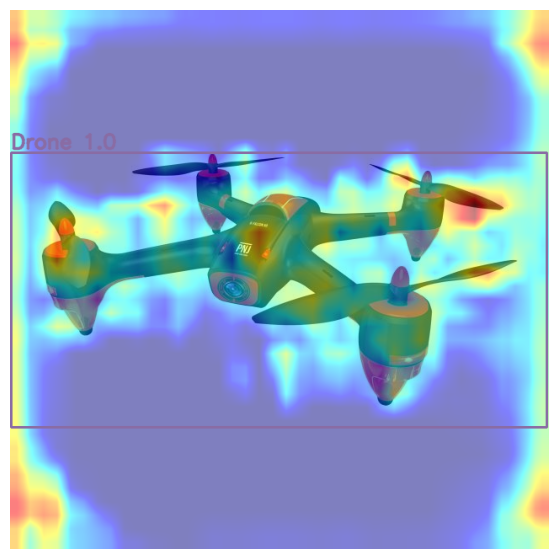

In [17]:

from YOLOv8_Explainer import yolov8_heatmap, display_images

model = yolov8_heatmap(
    weight="/content/runs/detect/train/weights/best.pt",
        conf_threshold=0.4,
        method = "EigenCAM"
)

imagelist = model(
    img_path="/content/drive/MyDrive/Colab Notebooks/yolov8/Dataset/test/images/00000002_jpg.rf.400f295f0017ec2defa6c4aa473fc4ea.jpg",
    )

display_images(imagelist)



Model summary: 225 layers, 3,011,238 parameters, 0 gradients, 8.2 GFLOPs


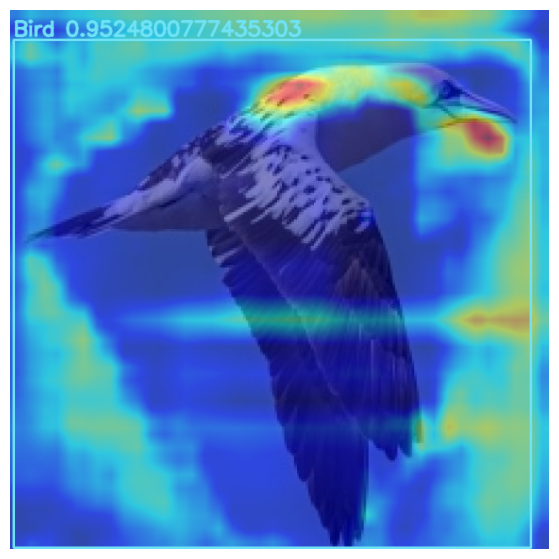

In [18]:
model = yolov8_heatmap(
    weight="/content/runs/detect/train/weights/best.pt",
        conf_threshold=0.4,
        method = "GradCAM"
)


imagelist = model(
    img_path="/content/drive/MyDrive/Colab Notebooks/yolov8/Dataset/test/images/BirdsFlying_1001_jpg.rf.a2a12f96d5c89535375a81ac6f3038c9.jpg",
    )

display_images(imagelist)


In [20]:
# loading the best pretrained model and running eval command

model = YOLO("/content/runs/detect/train/weights/best.pt")

model.eval()

Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=/content/runs/detect/train/weights/best.pt, data=/content/drive/MyDrive/Colab Notebooks/yolov8/Dataset/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=F

train: Scanning /content/drive/MyDrive/Colab Notebooks/yolov8/Dataset/train/labels.cache... 3131 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3131/3131 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/Colab Notebooks/yolov8/Dataset/valid/labels.cache... 261 images, 0 backgrounds, 0 corrupt: 100%|██████████| 261/261 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train2
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100       2.3G     0.6401     0.6198      1.231         24        640: 100%|██████████| 196/196 [00:22<00:00,  8.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.82it/s]

                   all        261        267      0.815      0.705      0.773      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.25G     0.6719     0.6056      1.253         29        640: 100%|██████████| 196/196 [00:21<00:00,  9.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.83it/s]

                   all        261        267      0.689      0.705      0.713      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.25G       0.69     0.6325      1.269         25        640: 100%|██████████| 196/196 [00:20<00:00,  9.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.90it/s]

                   all        261        267      0.593      0.717      0.678      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.25G        0.7     0.6489      1.263         31        640: 100%|██████████| 196/196 [00:20<00:00,  9.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.39it/s]


                   all        261        267       0.76      0.567      0.633      0.408

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.25G     0.7004     0.6472      1.272         33        640: 100%|██████████| 196/196 [00:20<00:00,  9.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.35it/s]

                   all        261        267      0.718       0.71      0.697      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.25G     0.7087     0.6274      1.276         27        640: 100%|██████████| 196/196 [00:20<00:00,  9.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.63it/s]

                   all        261        267      0.648      0.626      0.637      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.25G     0.6818     0.6074      1.255         32        640: 100%|██████████| 196/196 [00:20<00:00,  9.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.29it/s]

                   all        261        267       0.78      0.721      0.748      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.25G     0.6766     0.5916      1.246         29        640: 100%|██████████| 196/196 [00:20<00:00,  9.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.95it/s]

                   all        261        267      0.731      0.778      0.801      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.25G     0.6668     0.5841      1.248         37        640: 100%|██████████| 196/196 [00:20<00:00,  9.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.33it/s]

                   all        261        267      0.799      0.794      0.834      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.25G     0.6633     0.5861      1.237         32        640: 100%|██████████| 196/196 [00:20<00:00,  9.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.08it/s]

                   all        261        267      0.762      0.668      0.715      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.25G     0.6615      0.582      1.246         32        640: 100%|██████████| 196/196 [00:20<00:00,  9.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.48it/s]

                   all        261        267      0.878      0.672      0.796      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.25G       0.65     0.5677      1.237         26        640: 100%|██████████| 196/196 [00:20<00:00,  9.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.85it/s]

                   all        261        267      0.821      0.724      0.806      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.25G     0.6643     0.5781      1.244         33        640: 100%|██████████| 196/196 [00:20<00:00,  9.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.39it/s]


                   all        261        267      0.839      0.782      0.845      0.528

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.25G     0.6541     0.5648      1.236         32        640: 100%|██████████| 196/196 [00:20<00:00,  9.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.32it/s]

                   all        261        267      0.729      0.778      0.791      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.25G     0.6461      0.559      1.235         30        640: 100%|██████████| 196/196 [00:20<00:00,  9.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.65it/s]

                   all        261        267      0.765      0.727      0.777      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.25G     0.6354     0.5591      1.217         26        640: 100%|██████████| 196/196 [00:20<00:00,  9.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.52it/s]

                   all        261        267      0.823      0.806      0.857      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.25G     0.6386     0.5516      1.219         33        640: 100%|██████████| 196/196 [00:20<00:00,  9.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.62it/s]

                   all        261        267      0.718      0.766      0.789      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.25G     0.6287     0.5308      1.218         31        640: 100%|██████████| 196/196 [00:20<00:00,  9.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.65it/s]

                   all        261        267       0.77      0.744       0.76      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.25G     0.6287     0.5407      1.218         24        640: 100%|██████████| 196/196 [00:20<00:00,  9.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.69it/s]

                   all        261        267      0.838      0.755       0.82      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.25G     0.6169     0.5246      1.214         22        640: 100%|██████████| 196/196 [00:20<00:00,  9.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.14it/s]

                   all        261        267      0.793      0.747      0.763      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.25G     0.6181     0.5219      1.204         36        640: 100%|██████████| 196/196 [00:20<00:00,  9.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.48it/s]

                   all        261        267      0.763      0.693      0.738      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.25G      0.613     0.5066      1.205         29        640: 100%|██████████| 196/196 [00:20<00:00,  9.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.88it/s]


                   all        261        267      0.852      0.751      0.824      0.524

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.25G     0.6214     0.5113      1.211         29        640: 100%|██████████| 196/196 [00:20<00:00,  9.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.39it/s]

                   all        261        267      0.692      0.729      0.765      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.25G     0.6108     0.5109      1.204         30        640: 100%|██████████| 196/196 [00:20<00:00,  9.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.16it/s]


                   all        261        267      0.871      0.789      0.837      0.555

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.25G     0.6088     0.5114      1.202         24        640: 100%|██████████| 196/196 [00:20<00:00,  9.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.77it/s]

                   all        261        267      0.892      0.818      0.877       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.25G     0.6132     0.5094      1.209         25        640: 100%|██████████| 196/196 [00:20<00:00,  9.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.56it/s]


                   all        261        267      0.737      0.738      0.743      0.482

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.25G     0.5864     0.4896       1.19         26        640: 100%|██████████| 196/196 [00:20<00:00,  9.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.55it/s]

                   all        261        267      0.839      0.791      0.844       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.25G     0.6055      0.496      1.201         30        640: 100%|██████████| 196/196 [00:19<00:00,  9.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.84it/s]

                   all        261        267      0.762      0.753      0.764      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.25G     0.5967     0.4942      1.195         25        640: 100%|██████████| 196/196 [00:20<00:00,  9.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.81it/s]

                   all        261        267      0.814       0.74      0.864      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.25G     0.5925     0.4918      1.187         30        640: 100%|██████████| 196/196 [00:20<00:00,  9.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.53it/s]


                   all        261        267      0.703      0.711      0.726      0.505

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.25G     0.5944      0.485       1.19         34        640: 100%|██████████| 196/196 [00:20<00:00,  9.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.14it/s]

                   all        261        267      0.768      0.823      0.848      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.25G     0.5873     0.4782      1.186         25        640: 100%|██████████| 196/196 [00:20<00:00,  9.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.41it/s]

                   all        261        267      0.848      0.811      0.865      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.25G     0.5715      0.471      1.179         32        640: 100%|██████████| 196/196 [00:20<00:00,  9.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.14it/s]

                   all        261        267      0.829      0.801      0.846      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.25G     0.5698     0.4706      1.177         32        640: 100%|██████████| 196/196 [00:20<00:00,  9.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.37it/s]

                   all        261        267      0.773      0.792      0.812      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.25G     0.5882     0.4871      1.191         29        640: 100%|██████████| 196/196 [00:20<00:00,  9.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.25it/s]

                   all        261        267      0.861      0.767      0.853      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.25G     0.5713     0.4662      1.175         23        640: 100%|██████████| 196/196 [00:20<00:00,  9.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.97it/s]

                   all        261        267      0.926      0.761      0.885      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.25G     0.5675     0.4511      1.171         31        640: 100%|██████████| 196/196 [00:20<00:00,  9.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.91it/s]

                   all        261        267      0.803      0.855       0.88        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.25G     0.5722     0.4609      1.177         29        640: 100%|██████████| 196/196 [00:20<00:00,  9.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.96it/s]

                   all        261        267      0.856      0.745      0.862      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.25G     0.5852     0.4714      1.181         27        640: 100%|██████████| 196/196 [00:20<00:00,  9.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.97it/s]


                   all        261        267       0.93      0.763      0.849      0.558

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.25G      0.558     0.4478      1.171         32        640: 100%|██████████| 196/196 [00:20<00:00,  9.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.73it/s]

                   all        261        267       0.89      0.751      0.804       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.25G     0.5743     0.4622      1.182         31        640: 100%|██████████| 196/196 [00:20<00:00,  9.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.02it/s]

                   all        261        267        0.9      0.782      0.833      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.25G     0.5802     0.4594      1.178         31        640: 100%|██████████| 196/196 [00:20<00:00,  9.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.03it/s]

                   all        261        267      0.861      0.814      0.844      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.25G     0.5592       0.45       1.17         27        640: 100%|██████████| 196/196 [00:20<00:00,  9.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.31it/s]

                   all        261        267      0.884      0.769       0.83       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.25G     0.5604     0.4476      1.167         27        640: 100%|██████████| 196/196 [00:20<00:00,  9.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.55it/s]

                   all        261        267      0.822      0.776      0.835      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.25G     0.5536     0.4433      1.161         32        640: 100%|██████████| 196/196 [00:20<00:00,  9.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.94it/s]

                   all        261        267       0.83      0.785      0.831      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.25G     0.5608     0.4405      1.166         22        640: 100%|██████████| 196/196 [00:20<00:00,  9.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.96it/s]

                   all        261        267      0.848      0.868      0.906      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.25G     0.5476     0.4419      1.158         26        640: 100%|██████████| 196/196 [00:20<00:00,  9.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.59it/s]

                   all        261        267      0.876      0.777      0.816      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.25G     0.5546     0.4371      1.166         30        640: 100%|██████████| 196/196 [00:20<00:00,  9.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.09it/s]

                   all        261        267       0.83      0.787      0.856      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.25G     0.5493     0.4323      1.156         31        640: 100%|██████████| 196/196 [00:20<00:00,  9.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.80it/s]

                   all        261        267      0.832      0.818      0.844      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.25G     0.5528       0.44      1.164         29        640: 100%|██████████| 196/196 [00:20<00:00,  9.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.64it/s]

                   all        261        267      0.833      0.854      0.866      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.25G     0.5352     0.4273      1.157         28        640: 100%|██████████| 196/196 [00:20<00:00,  9.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.25it/s]

                   all        261        267      0.879      0.857      0.872       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.25G     0.5449     0.4216      1.156         34        640: 100%|██████████| 196/196 [00:20<00:00,  9.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.62it/s]

                   all        261        267      0.811      0.828      0.838      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.25G     0.5382     0.4172      1.156         28        640: 100%|██████████| 196/196 [00:20<00:00,  9.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.63it/s]


                   all        261        267      0.839      0.807      0.877      0.621

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.25G     0.5499     0.4325      1.165         27        640: 100%|██████████| 196/196 [00:20<00:00,  9.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.06it/s]

                   all        261        267      0.908      0.742      0.802      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.25G     0.5388     0.4187      1.154         25        640: 100%|██████████| 196/196 [00:20<00:00,  9.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.12it/s]

                   all        261        267      0.837      0.843      0.857      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.25G     0.5279     0.4133      1.149         34        640: 100%|██████████| 196/196 [00:20<00:00,  9.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.14it/s]

                   all        261        267      0.883      0.829       0.89      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.25G     0.5337     0.4259       1.15         33        640: 100%|██████████| 196/196 [00:20<00:00,  9.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.05it/s]

                   all        261        267      0.893      0.855      0.894      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.25G     0.5283     0.4094      1.152         27        640: 100%|██████████| 196/196 [00:20<00:00,  9.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.56it/s]

                   all        261        267      0.877      0.803      0.859      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.25G     0.5415     0.4184      1.159         29        640: 100%|██████████| 196/196 [00:20<00:00,  9.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.76it/s]

                   all        261        267      0.839      0.815       0.87      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.26G      0.535     0.4226      1.145         26        640: 100%|██████████| 196/196 [00:20<00:00,  9.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.79it/s]


                   all        261        267      0.828      0.838       0.87      0.614

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.25G     0.5252     0.4096      1.143         30        640: 100%|██████████| 196/196 [00:20<00:00,  9.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.81it/s]

                   all        261        267      0.854      0.827      0.869      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.25G     0.5163     0.4107      1.137         28        640: 100%|██████████| 196/196 [00:19<00:00,  9.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.00it/s]

                   all        261        267      0.822      0.802       0.86      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.25G     0.5123     0.3992      1.135         33        640: 100%|██████████| 196/196 [00:20<00:00,  9.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.62it/s]

                   all        261        267      0.809      0.807       0.86      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.25G     0.5288     0.4109      1.149         23        640: 100%|██████████| 196/196 [00:20<00:00,  9.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.38it/s]

                   all        261        267      0.895      0.826      0.842      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.25G     0.5179     0.4011      1.137         24        640: 100%|██████████| 196/196 [00:20<00:00,  9.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.25it/s]

                   all        261        267      0.852      0.827      0.884      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.25G      0.518     0.3981      1.141         35        640: 100%|██████████| 196/196 [00:20<00:00,  9.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.84it/s]

                   all        261        267      0.913      0.807      0.881      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.25G      0.521     0.3986      1.142         26        640: 100%|██████████| 196/196 [00:20<00:00,  9.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.47it/s]

                   all        261        267      0.912      0.779       0.87      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.25G     0.5198     0.3993      1.139         35        640: 100%|██████████| 196/196 [00:20<00:00,  9.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.16it/s]


                   all        261        267      0.882      0.854      0.876      0.635

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.25G     0.5087     0.3978      1.135         31        640: 100%|██████████| 196/196 [00:20<00:00,  9.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.91it/s]

                   all        261        267      0.893      0.832      0.856      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.25G     0.5123     0.3922      1.135         22        640: 100%|██████████| 196/196 [00:20<00:00,  9.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.60it/s]

                   all        261        267      0.893      0.827      0.853       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.25G     0.5143     0.3974      1.138         31        640: 100%|██████████| 196/196 [00:20<00:00,  9.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.98it/s]


                   all        261        267       0.86      0.825      0.858      0.606

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.25G     0.5158      0.394      1.137         31        640: 100%|██████████| 196/196 [00:20<00:00,  9.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.57it/s]

                   all        261        267      0.905      0.827      0.868      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.25G     0.5104     0.3937      1.131         27        640: 100%|██████████| 196/196 [00:20<00:00,  9.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.91it/s]

                   all        261        267      0.854      0.853      0.871      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.25G     0.5013      0.387      1.132         29        640: 100%|██████████| 196/196 [00:20<00:00,  9.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.83it/s]

                   all        261        267      0.906      0.805      0.879       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.25G     0.5129     0.3962      1.135         27        640: 100%|██████████| 196/196 [00:20<00:00,  9.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.03it/s]

                   all        261        267      0.855      0.858      0.907      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.25G     0.4979     0.3803      1.126         34        640: 100%|██████████| 196/196 [00:20<00:00,  9.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.18it/s]

                   all        261        267      0.916      0.797      0.883      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.25G     0.4967     0.3856      1.128         33        640: 100%|██████████| 196/196 [00:20<00:00,  9.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.23it/s]

                   all        261        267      0.883      0.785      0.864      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.25G     0.4795     0.3772       1.12         26        640: 100%|██████████| 196/196 [00:20<00:00,  9.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.08it/s]

                   all        261        267       0.91      0.806      0.874      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.25G     0.4914     0.3792      1.127         27        640: 100%|██████████| 196/196 [00:20<00:00,  9.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.10it/s]

                   all        261        267      0.899      0.821      0.885      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.25G     0.4935      0.368      1.121         22        640: 100%|██████████| 196/196 [00:20<00:00,  9.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.16it/s]

                   all        261        267      0.891      0.818      0.873      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.25G      0.487     0.3721      1.118         28        640: 100%|██████████| 196/196 [00:20<00:00,  9.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.64it/s]

                   all        261        267      0.928      0.805      0.881      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.25G     0.4824     0.3705      1.113         27        640: 100%|██████████| 196/196 [00:20<00:00,  9.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.61it/s]


                   all        261        267      0.933       0.79      0.879      0.644

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.25G     0.4834     0.3624      1.115         32        640: 100%|██████████| 196/196 [00:20<00:00,  9.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.57it/s]

                   all        261        267      0.858      0.863      0.882      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.25G      0.484     0.3624      1.113         32        640: 100%|██████████| 196/196 [00:20<00:00,  9.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.79it/s]

                   all        261        267      0.876      0.828      0.871      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.25G     0.4799     0.3713      1.118         28        640: 100%|██████████| 196/196 [00:20<00:00,  9.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.78it/s]

                   all        261        267      0.863      0.861      0.886      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.25G     0.4703     0.3606      1.111         34        640: 100%|██████████| 196/196 [00:20<00:00,  9.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.13it/s]

                   all        261        267       0.89      0.808      0.864      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.25G     0.4781     0.3613      1.113         30        640: 100%|██████████| 196/196 [00:20<00:00,  9.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.98it/s]

                   all        261        267      0.873      0.849      0.876      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.25G     0.4798     0.3687      1.116         33        640: 100%|██████████| 196/196 [00:20<00:00,  9.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.41it/s]

                   all        261        267      0.927       0.81      0.865      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.25G      0.471     0.3575      1.109         32        640: 100%|██████████| 196/196 [00:20<00:00,  9.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.44it/s]

                   all        261        267      0.906       0.84      0.898      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.25G     0.4672     0.3539      1.103         35        640: 100%|██████████| 196/196 [00:20<00:00,  9.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.55it/s]

                   all        261        267      0.895      0.823      0.885      0.638


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.25G     0.3723     0.2269      1.091         11        640: 100%|██████████| 196/196 [00:21<00:00,  9.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.64it/s]

                   all        261        267      0.903      0.787      0.864      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.25G     0.3686     0.2079      1.084         11        640: 100%|██████████| 196/196 [00:20<00:00,  9.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.28it/s]

                   all        261        267      0.945      0.808      0.906      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.25G     0.3583     0.2012      1.073         11        640: 100%|██████████| 196/196 [00:19<00:00,  9.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.43it/s]

                   all        261        267      0.898      0.832      0.896      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.25G     0.3573     0.1981       1.08         11        640: 100%|██████████| 196/196 [00:19<00:00,  9.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.97it/s]

                   all        261        267      0.876       0.84      0.895      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.25G     0.3513     0.1947      1.073         11        640: 100%|██████████| 196/196 [00:19<00:00,  9.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.62it/s]

                   all        261        267      0.876      0.794      0.886      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.25G     0.3519     0.1978      1.073         11        640: 100%|██████████| 196/196 [00:19<00:00,  9.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.88it/s]

                   all        261        267      0.855      0.817      0.885      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.25G     0.3466     0.1913      1.068         11        640: 100%|██████████| 196/196 [00:19<00:00,  9.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.71it/s]

                   all        261        267      0.885      0.819      0.894      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.25G     0.3528     0.1937      1.071         11        640: 100%|██████████| 196/196 [00:19<00:00,  9.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.82it/s]

                   all        261        267      0.892      0.846      0.908      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.25G     0.3429     0.1906      1.065         11        640: 100%|██████████| 196/196 [00:19<00:00,  9.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.35it/s]

                   all        261        267      0.892      0.833      0.906      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.25G     0.3373     0.1826      1.055         11        640: 100%|██████████| 196/196 [00:20<00:00,  9.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.30it/s]

                   all        261        267      0.921      0.809      0.895      0.652



100 epochs completed in 0.613 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.3MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 168 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  4.99it/s]


                   all        261        267      0.876      0.832      0.895      0.661
                  Bird        203        208      0.863      0.986      0.986      0.805
                 Drone         59         59      0.889      0.678      0.804      0.517
Speed: 0.1ms preprocess, 0.6ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b335d3c2b00>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

## Y8 - Metrics & Benchmarking

In [21]:
# importing benchmark

from ultralytics.utils.benchmarks import benchmark

In [22]:
# Loading the custom model

model = YOLO('/content/runs/detect/train2/weights/best.pt')

benchmark(model=model,
          data="/content/drive/MyDrive/Colab Notebooks/yolov8/Dataset/test/images", imgsz=640, device=0)


Setup complete ✅ (12 CPUs, 83.5 GB RAM, 39.2/235.7 GB disk)

Benchmarks complete for best.pt on /content/drive/MyDrive/Colab Notebooks/yolov8/Dataset/test/images at imgsz=640 (308.52s)
                   Format Status❔  Size (MB) metrics/mAP50-95(B) Inference time (ms/im)   FPS
0                 PyTorch       ❎        6.0                None                   None  None
1             TorchScript       ❎       11.9                None                   None  None
2                    ONNX       ❎       11.7                None                   None  None
3                OpenVINO       ❌        0.0                None                   None  None
4                TensorRT       ❎       13.8                None                   None  None
5                  CoreML       ❌        0.0                None                   None  None
6   TensorFlow SavedModel       ❎       29.2                None                   None  None
7     TensorFlow GraphDef       ❎       11.7                Non

Format Status❔  Size (MB) metrics/mAP50-95(B) Inference time (ms/im)   FPS
0                 PyTorch       ❎        6.0                None                   None  None
1             TorchScript       ❎       11.9                None                   None  None
2                    ONNX       ❎       11.7                None                   None  None
3                OpenVINO       ❌        0.0                None                   None  None
4                TensorRT       ❎       13.8                None                   None  None
5                  CoreML       ❌        0.0                None                   None  None
6   TensorFlow SavedModel       ❎       29.2                None                   None  None
7     TensorFlow GraphDef       ❎       11.7                None                   None  None
8         TensorFlow Lite       ❌        0.0                None                   None  None
9     TensorFlow Edge TPU       ❌        0.0                None                   None  None
10          TensorFlow.js       ❌        0.0                None                   None  None
11           PaddlePaddle       ❎       23.3                None                   None  None
12                    MNN       ❎       11.6                None                   None  None
13                   NCNN       ❎       11.6                None                   None  None

## Y8 - Prediction


image 1/1 /content/drive/MyDrive/Colab Notebooks/yolov8/Dataset/test/images/00000002_jpg.rf.400f295f0017ec2defa6c4aa473fc4ea.jpg: 640x640 1 Drone, 12.8ms
Speed: 3.7ms preprocess, 12.8ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


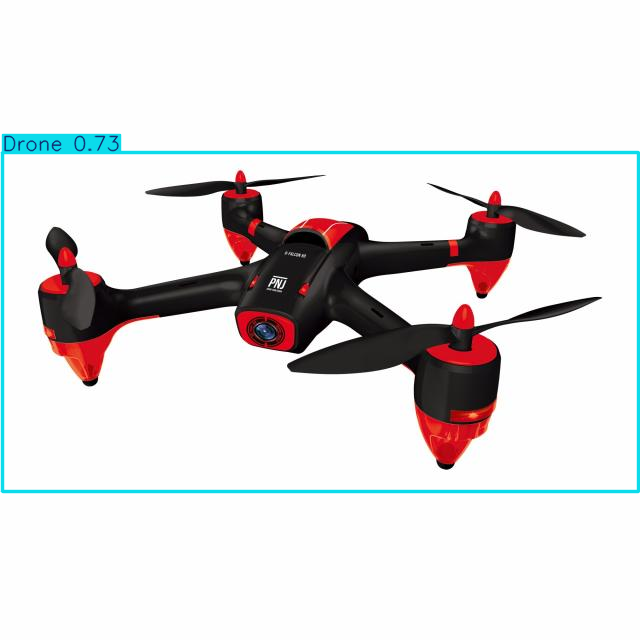

In [23]:
# detecting the object in the test image

result = model('/content/drive/MyDrive/Colab Notebooks/yolov8/Dataset/test/images/00000002_jpg.rf.400f295f0017ec2defa6c4aa473fc4ea.jpg')

result[0].show()


image 1/1 /content/drive/MyDrive/Colab Notebooks/yolov8/Dataset/test/images/BirdsFlying_1546_jpg.rf.e7b0da7ec1501731617c9332323c90a7.jpg: 640x640 1 Bird, 8.3ms
Speed: 2.2ms preprocess, 8.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


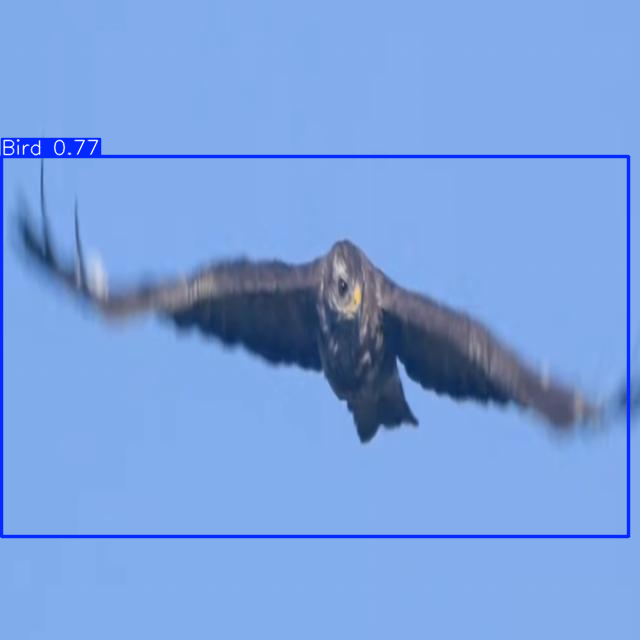

In [24]:
# detecting the object in the test image

result = model('/content/drive/MyDrive/Colab Notebooks/yolov8/Dataset/test/images/BirdsFlying_1546_jpg.rf.e7b0da7ec1501731617c9332323c90a7.jpg')

result[0].show()


image 1/1 /content/drive/MyDrive/Colab Notebooks/yolov8/atest.jpeg: 416x640 1 Bird, 53.7ms
Speed: 3.3ms preprocess, 53.7ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 640)


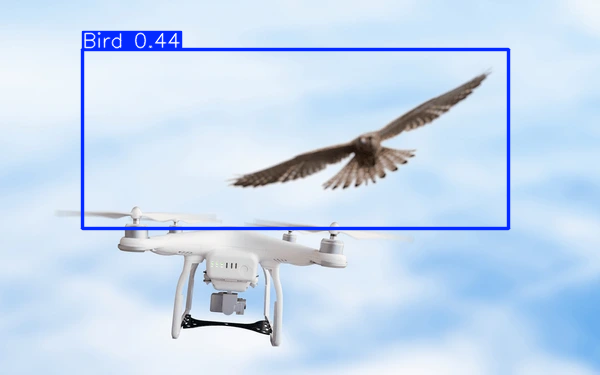

In [26]:
# detecting the object in the test image

result = model('/content/drive/MyDrive/Colab Notebooks/yolov8/atest.jpeg')

result[0].show()

The model failed to detect the drone

In [27]:
# detecting the object in the test video file

result1 = model('/content/drive/MyDrive/Colab Notebooks/yolov8/Dataset/test/videos/birds_test_video.mp4',save=True)

result2 = model('/content/drive/MyDrive/Colab Notebooks/yolov8/Dataset/test/videos/drone_test_video.mp4',save=True)



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/252) /content/drive/MyDrive/Colab Notebooks/yolov8/Dataset/test/videos/birds_test_video.mp4: 384x640 (no detections), 52.1ms
video 1/1 (frame 2/252) /content/drive/MyDrive/Colab Notebooks/yolov8/Dataset/test/videos/birds_test_video.mp4: 384x640 (no detections), 10.0ms
video 1/1 (frame 3/252) /content/drive/MyDrive/Colab Notebooks/yolov8/Dataset/test/videos/birds_test_video.mp4: 384x640 (no detections), 8.3ms
video 1/1 (frame 4/252) /

# Building yolo11 object detection pretrained model on top of the same dataset

In [5]:
# loading a pre-trained model

model = YOLO('yolo11n.pt')

100%|██████████| 5.35M/5.35M [00:00<00:00, 67.7MB/s]


In [6]:
!nvidia-smi

Thu Nov  7 09:47:04 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off | 00000000:00:04.0 Off |                    0 |
| N/A   30C    P0              38W / 400W |      2MiB / 40960MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

## Y11 - Training

In [7]:
# train the model

train_results = model.train(
    data = "/content/drive/MyDrive/Colab Notebooks/yolov8/Dataset/data.yaml",
    epochs = 20,
    imgsz = (320, 640),
    device = 'cuda:0'
)

Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/drive/MyDrive/Colab Notebooks/yolov8/Dataset/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=(320, 640), save=True, save_period=-1, cache=False, device=cuda:0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, sa

100%|██████████| 755k/755k [00:00<00:00, 14.1MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/drive/MyDrive/Colab Notebooks/yolov8/Dataset/train/labels.cache... 3131 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3131/3131 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/MyDrive/Colab Notebooks/yolov8/Dataset/valid/labels.cache... 261 images, 0 backgrounds, 0 corrupt: 100%|██████████| 261/261 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      2.57G     0.8558      1.863      1.409         24        640: 100%|██████████| 196/196 [01:40<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.21it/s]

                   all        261        267      0.311      0.467      0.302      0.121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.58G     0.8987      1.221      1.433         29        640: 100%|██████████| 196/196 [00:24<00:00,  8.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.06it/s]


                   all        261        267      0.489      0.498      0.392      0.186

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20       2.6G     0.8997      1.046      1.439         25        640: 100%|██████████| 196/196 [00:23<00:00,  8.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.46it/s]


                   all        261        267      0.376      0.472      0.368      0.173

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20       2.6G     0.8747     0.9524      1.403         31        640: 100%|██████████| 196/196 [00:23<00:00,  8.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.39it/s]

                   all        261        267      0.659      0.641      0.676      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      2.59G     0.8317     0.8589      1.379         33        640: 100%|██████████| 196/196 [00:23<00:00,  8.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.06it/s]

                   all        261        267      0.708      0.665      0.673      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      2.59G     0.8073     0.7973       1.36         27        640: 100%|██████████| 196/196 [00:23<00:00,  8.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.71it/s]


                   all        261        267      0.591      0.521      0.438       0.27

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      2.59G     0.7589     0.7402      1.322         32        640: 100%|██████████| 196/196 [00:23<00:00,  8.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.07it/s]

                   all        261        267      0.692      0.652      0.715      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      2.59G     0.7333     0.6934      1.295         29        640: 100%|██████████| 196/196 [00:23<00:00,  8.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.34it/s]

                   all        261        267      0.717      0.691      0.694       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      2.59G     0.6992     0.6516      1.281         37        640: 100%|██████████| 196/196 [00:23<00:00,  8.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.34it/s]

                   all        261        267      0.692      0.652      0.696      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      2.59G     0.6899     0.6266      1.264         32        640: 100%|██████████| 196/196 [00:23<00:00,  8.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.33it/s]

                   all        261        267      0.829      0.626      0.735      0.493


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20       2.6G      0.604     0.4855      1.323         11        640: 100%|██████████| 196/196 [00:24<00:00,  8.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.96it/s]

                   all        261        267      0.725      0.714      0.751      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20       2.6G     0.5821     0.4175      1.299         13        640: 100%|██████████| 196/196 [00:23<00:00,  8.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.62it/s]

                   all        261        267      0.841      0.728      0.822      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20       2.6G     0.5517     0.3753      1.271         11        640: 100%|██████████| 196/196 [00:23<00:00,  8.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.11it/s]


                   all        261        267      0.739      0.728      0.746      0.506

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20       2.6G     0.5298     0.3622       1.25         11        640: 100%|██████████| 196/196 [00:22<00:00,  8.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.51it/s]

                   all        261        267       0.78      0.685      0.784       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      2.59G     0.5103     0.3294      1.229         11        640: 100%|██████████| 196/196 [00:23<00:00,  8.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.80it/s]

                   all        261        267       0.76        0.8      0.838      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      2.59G     0.4918     0.3112      1.208         11        640: 100%|██████████| 196/196 [00:23<00:00,  8.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.86it/s]

                   all        261        267      0.737      0.672      0.756      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20       2.6G     0.4818     0.2951      1.192         11        640: 100%|██████████| 196/196 [00:23<00:00,  8.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.74it/s]

                   all        261        267      0.714      0.737      0.741      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20       2.6G     0.4572     0.2744      1.181         11        640: 100%|██████████| 196/196 [00:22<00:00,  8.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.08it/s]

                   all        261        267      0.777      0.732        0.8      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20       2.6G     0.4418      0.265      1.163         11        640: 100%|██████████| 196/196 [00:23<00:00,  8.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.76it/s]

                   all        261        267      0.826      0.775      0.812      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20       2.6G     0.4389     0.2478      1.157         11        640: 100%|██████████| 196/196 [00:22<00:00,  8.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.16it/s]

                   all        261        267      0.762      0.774      0.815      0.587



20 epochs completed in 0.164 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11n summary (fused): 238 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  4.96it/s]


                   all        261        267      0.783       0.73        0.8      0.591
                  Bird        203        208      0.815      0.986       0.98      0.775
                 Drone         59         59       0.75      0.475       0.62      0.406
Speed: 0.1ms preprocess, 0.6ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/train


The trained model has 77.5% score for bird category and comparatively a lower score for drone category

## Y11 - Evaluation

In [8]:
# loading the best pretrained model

model = YOLO("/content/runs/detect/train/weights/best.pt")

In [9]:
# Validate the model

metrics = model.val()
metrics.box.map  # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps  # a list contains map50-95 of each category

Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11n summary (fused): 238 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning /content/drive/MyDrive/Colab Notebooks/yolov8/Dataset/valid/labels.cache... 261 images, 0 backgrounds, 0 corrupt: 100%|██████████| 261/261 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.64it/s]


                   all        261        267      0.782       0.73        0.8       0.59
                  Bird        203        208      0.817      0.986       0.98      0.773
                 Drone         59         59      0.748      0.475       0.62      0.406
Speed: 0.2ms preprocess, 2.1ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/val


array([    0.77318,     0.40593])

In [11]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

!pip install YOLOv8-Explainer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 57.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for grad-cam: filename=grad_cam-1.4.8-py3-none-any.whl size=38243 sha256=9f88eb55fa04bf751b3d3c627c93323c94e6ba9b51ec763bd8ee5fba200ce03a
  Stored in directory: /root/.cache/pip/wheels/f8/04/36/94ff3c8a4215826a21946b34c01180817e606989fdf53f7cd6
Successfully built grad-cam


YOLO11n summary: 319 layers, 2,590,230 parameters, 0 gradients, 6.4 GFLOPs


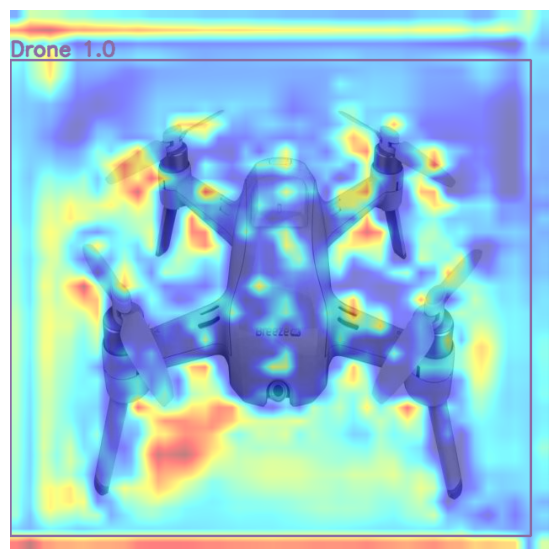

In [12]:

from YOLOv8_Explainer import yolov8_heatmap, display_images

model = yolov8_heatmap(
    weight="/content/runs/detect/train/weights/best.pt",
        conf_threshold=0.6,
        method = "XGradCAM"
)

imagelist = model(
    img_path="/content/drive/MyDrive/Colab Notebooks/yolov8/Dataset/test/images/00000672_jpeg.rf.5c0f430761c6269619247d8908d08e46.jpg",
    )

display_images(imagelist)



YOLO11n summary: 319 layers, 2,590,230 parameters, 0 gradients, 6.4 GFLOPs


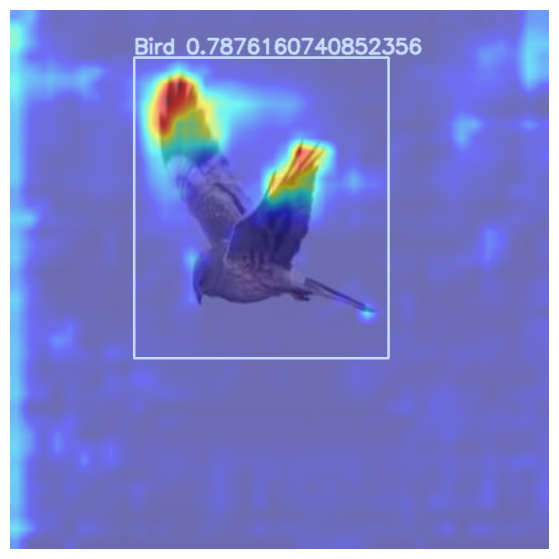

In [15]:
model = yolov8_heatmap(
    weight="/content/runs/detect/train/weights/best.pt",
        conf_threshold=0.6,
        method = "GradCAM"
)

imagelist = model(
    img_path="/content/drive/MyDrive/Colab Notebooks/yolov8/Dataset/test/images/BirdsFlying_129_jpg.rf.4ae75113c5aa0888f7a105635027d53e.jpg",
    )

display_images(imagelist)



In [16]:
# loading the best pretrained model and running eval command

model = YOLO("/content/runs/detect/train/weights/best.pt")

model.eval()

Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=/content/runs/detect/train/weights/best.pt, data=/content/drive/MyDrive/Colab Notebooks/yolov8/Dataset/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=F

train: Scanning /content/drive/MyDrive/Colab Notebooks/yolov8/Dataset/train/labels.cache... 3131 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3131/3131 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/Colab Notebooks/yolov8/Dataset/valid/labels.cache... 261 images, 0 backgrounds, 0 corrupt: 100%|██████████| 261/261 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train2
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.68G      0.647     0.6174      1.242         24        640: 100%|██████████| 196/196 [00:41<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.43it/s]


                   all        261        267      0.927       0.72      0.858      0.591

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100       2.6G     0.6858     0.5945      1.261         29        640: 100%|██████████| 196/196 [00:25<00:00,  7.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.59it/s]

                   all        261        267      0.653       0.58      0.636      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100       2.6G     0.7112     0.6306      1.283         25        640: 100%|██████████| 196/196 [00:24<00:00,  8.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.03it/s]

                   all        261        267      0.682      0.605      0.721      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100       2.6G     0.7227     0.6359      1.286         31        640: 100%|██████████| 196/196 [00:24<00:00,  8.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.15it/s]

                   all        261        267      0.665       0.73      0.714      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100       2.6G     0.7095     0.6367      1.281         33        640: 100%|██████████| 196/196 [00:24<00:00,  8.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.77it/s]

                   all        261        267      0.645      0.658      0.645      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100       2.6G     0.7221     0.6206      1.286         27        640: 100%|██████████| 196/196 [00:24<00:00,  8.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.97it/s]

                   all        261        267       0.73      0.755      0.772      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100       2.6G     0.6998     0.6188      1.273         32        640: 100%|██████████| 196/196 [00:24<00:00,  8.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.53it/s]

                   all        261        267      0.614      0.704       0.65      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100       2.6G     0.6988     0.5978      1.269         29        640: 100%|██████████| 196/196 [00:24<00:00,  8.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.61it/s]

                   all        261        267      0.626      0.676      0.678      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100       2.6G     0.6864     0.5909      1.266         37        640: 100%|██████████| 196/196 [00:24<00:00,  8.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.45it/s]

                   all        261        267      0.722      0.677      0.722      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100       2.6G     0.6789     0.5835      1.249         32        640: 100%|██████████| 196/196 [00:24<00:00,  8.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.29it/s]

                   all        261        267      0.778      0.656      0.757      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100       2.6G     0.6755     0.5771      1.255         32        640: 100%|██████████| 196/196 [00:24<00:00,  8.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.92it/s]

                   all        261        267      0.642       0.62      0.692      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100       2.6G     0.6591     0.5622      1.249         26        640: 100%|██████████| 196/196 [00:24<00:00,  8.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.99it/s]

                   all        261        267      0.799      0.773      0.792       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100       2.6G     0.6886     0.5729      1.266         33        640: 100%|██████████| 196/196 [00:24<00:00,  8.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.18it/s]

                   all        261        267      0.739      0.786      0.765      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100       2.6G     0.6671     0.5647      1.248         32        640: 100%|██████████| 196/196 [00:24<00:00,  8.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.57it/s]

                   all        261        267      0.737      0.683       0.78      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100       2.6G     0.6641     0.5604      1.251         30        640: 100%|██████████| 196/196 [00:24<00:00,  8.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.54it/s]

                   all        261        267      0.691       0.73      0.743      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100       2.6G     0.6436     0.5507      1.228         26        640: 100%|██████████| 196/196 [00:24<00:00,  8.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.89it/s]

                   all        261        267       0.76      0.696      0.785      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100       2.6G     0.6554     0.5413      1.239         33        640: 100%|██████████| 196/196 [00:24<00:00,  8.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.45it/s]

                   all        261        267      0.742      0.654      0.735      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100       2.6G     0.6419      0.532      1.235         31        640: 100%|██████████| 196/196 [00:24<00:00,  8.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.76it/s]

                   all        261        267      0.789      0.738      0.788      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100       2.6G      0.634     0.5267      1.226         24        640: 100%|██████████| 196/196 [00:24<00:00,  8.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.96it/s]


                   all        261        267      0.885      0.719      0.827      0.527

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100       2.6G     0.6301      0.523      1.228         22        640: 100%|██████████| 196/196 [00:24<00:00,  8.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.63it/s]

                   all        261        267      0.655      0.697       0.71      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100       2.6G      0.622     0.5234      1.214         36        640: 100%|██████████| 196/196 [00:24<00:00,  8.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.94it/s]

                   all        261        267      0.723      0.829      0.821      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100       2.6G     0.6226     0.5012      1.214         29        640: 100%|██████████| 196/196 [00:24<00:00,  8.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.52it/s]

                   all        261        267      0.837      0.728      0.857      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100       2.6G     0.6307      0.505       1.22         29        640: 100%|██████████| 196/196 [00:24<00:00,  8.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.73it/s]


                   all        261        267      0.691      0.754      0.767      0.548

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100       2.6G     0.6167     0.5071       1.21         30        640: 100%|██████████| 196/196 [00:24<00:00,  8.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.40it/s]

                   all        261        267      0.844      0.803      0.848      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100       2.6G     0.6192     0.5064      1.213         24        640: 100%|██████████| 196/196 [00:24<00:00,  8.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.39it/s]

                   all        261        267      0.805       0.81      0.815      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100       2.6G     0.6258     0.5024       1.22         25        640: 100%|██████████| 196/196 [00:24<00:00,  8.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.60it/s]

                   all        261        267       0.77      0.787      0.827      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100       2.6G     0.6028     0.4841      1.205         26        640: 100%|██████████| 196/196 [00:24<00:00,  8.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.90it/s]

                   all        261        267      0.885      0.779      0.859      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100       2.6G     0.6224      0.492      1.215         30        640: 100%|██████████| 196/196 [00:24<00:00,  8.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.87it/s]

                   all        261        267      0.852      0.748      0.815      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100       2.6G     0.6013     0.4911      1.203         25        640: 100%|██████████| 196/196 [00:24<00:00,  8.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.47it/s]

                   all        261        267      0.825      0.833      0.886        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100       2.6G      0.601     0.4893      1.202         30        640: 100%|██████████| 196/196 [00:24<00:00,  8.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.49it/s]

                   all        261        267      0.817      0.716      0.797      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100       2.6G     0.6061     0.4868      1.202         34        640: 100%|██████████| 196/196 [00:24<00:00,  8.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.26it/s]

                   all        261        267      0.763      0.768      0.802      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100       2.6G     0.6004     0.4732      1.197         25        640: 100%|██████████| 196/196 [00:24<00:00,  8.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.42it/s]

                   all        261        267      0.834      0.731      0.804      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100       2.6G      0.584     0.4679      1.187         32        640: 100%|██████████| 196/196 [00:24<00:00,  8.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.12it/s]

                   all        261        267      0.736      0.815      0.833      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100       2.6G     0.5782     0.4628      1.186         32        640: 100%|██████████| 196/196 [00:24<00:00,  8.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.96it/s]

                   all        261        267        0.8      0.775      0.817      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100       2.6G     0.6053     0.4848      1.206         29        640: 100%|██████████| 196/196 [00:24<00:00,  8.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.36it/s]

                   all        261        267      0.831      0.757      0.849       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100       2.6G     0.5762     0.4586      1.183         23        640: 100%|██████████| 196/196 [00:23<00:00,  8.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.78it/s]

                   all        261        267      0.842      0.873      0.874      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100       2.6G     0.5773      0.445       1.18         31        640: 100%|██████████| 196/196 [00:24<00:00,  8.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.54it/s]

                   all        261        267      0.799      0.856       0.86      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100       2.6G     0.5767     0.4481      1.183         29        640: 100%|██████████| 196/196 [00:24<00:00,  8.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.72it/s]

                   all        261        267      0.802      0.728      0.816       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100       2.6G     0.5862     0.4684      1.187         27        640: 100%|██████████| 196/196 [00:24<00:00,  8.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.46it/s]

                   all        261        267      0.856       0.67      0.788      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100       2.6G     0.5698     0.4483      1.184         32        640: 100%|██████████| 196/196 [00:24<00:00,  8.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.56it/s]

                   all        261        267      0.815      0.792      0.834      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100       2.6G     0.5819     0.4503      1.188         31        640: 100%|██████████| 196/196 [00:24<00:00,  8.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.90it/s]

                   all        261        267      0.811      0.779      0.846      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100       2.6G     0.5866     0.4493      1.184         31        640: 100%|██████████| 196/196 [00:24<00:00,  8.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.34it/s]

                   all        261        267      0.823      0.801       0.84      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100       2.6G     0.5662     0.4375      1.177         27        640: 100%|██████████| 196/196 [00:24<00:00,  8.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.42it/s]


                   all        261        267      0.797      0.798      0.878      0.596

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100       2.6G     0.5663     0.4446      1.173         27        640: 100%|██████████| 196/196 [00:24<00:00,  8.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.27it/s]

                   all        261        267      0.744      0.703      0.829      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100       2.6G     0.5643     0.4323       1.17         32        640: 100%|██████████| 196/196 [00:24<00:00,  8.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.42it/s]

                   all        261        267      0.827      0.706        0.8       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100       2.6G     0.5671     0.4422      1.171         22        640: 100%|██████████| 196/196 [00:24<00:00,  8.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.66it/s]

                   all        261        267      0.791       0.74      0.844      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100       2.6G     0.5562     0.4274      1.166         26        640: 100%|██████████| 196/196 [00:24<00:00,  8.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.60it/s]

                   all        261        267      0.827      0.754      0.823      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100       2.6G     0.5701     0.4275      1.178         30        640: 100%|██████████| 196/196 [00:24<00:00,  8.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.35it/s]

                   all        261        267      0.782      0.774      0.841      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100       2.6G     0.5498     0.4279      1.159         31        640: 100%|██████████| 196/196 [00:24<00:00,  8.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.89it/s]

                   all        261        267      0.728      0.751      0.823       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100       2.6G     0.5569     0.4311      1.171         29        640: 100%|██████████| 196/196 [00:24<00:00,  8.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.60it/s]

                   all        261        267        0.9      0.793       0.86      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100       2.6G     0.5402     0.4165      1.162         28        640: 100%|██████████| 196/196 [00:23<00:00,  8.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.59it/s]

                   all        261        267      0.891      0.866      0.911      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100       2.6G     0.5548     0.4243      1.164         34        640: 100%|██████████| 196/196 [00:24<00:00,  8.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.42it/s]

                   all        261        267       0.76      0.811      0.826      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100       2.6G     0.5415     0.4129      1.163         28        640: 100%|██████████| 196/196 [00:24<00:00,  8.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.14it/s]

                   all        261        267      0.762      0.812       0.86      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100       2.6G       0.56     0.4282      1.172         27        640: 100%|██████████| 196/196 [00:24<00:00,  8.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.30it/s]

                   all        261        267      0.856      0.842      0.904       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100       2.6G      0.541     0.4094      1.158         25        640: 100%|██████████| 196/196 [00:24<00:00,  8.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.84it/s]

                   all        261        267      0.851       0.85      0.883      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100       2.6G     0.5272     0.4045      1.151         34        640: 100%|██████████| 196/196 [00:24<00:00,  8.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.91it/s]

                   all        261        267      0.904      0.755      0.865      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100       2.6G     0.5423     0.4236      1.159         33        640: 100%|██████████| 196/196 [00:24<00:00,  8.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.01it/s]

                   all        261        267      0.829      0.826      0.854      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100       2.6G     0.5306     0.4022      1.155         27        640: 100%|██████████| 196/196 [00:24<00:00,  8.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.17it/s]

                   all        261        267      0.797      0.778      0.838      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100       2.6G     0.5457     0.4137      1.163         29        640: 100%|██████████| 196/196 [00:24<00:00,  8.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.37it/s]

                   all        261        267      0.874      0.799      0.876      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.62G     0.5466     0.4085      1.155         26        640: 100%|██████████| 196/196 [00:24<00:00,  8.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.41it/s]

                   all        261        267      0.827       0.82       0.85      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100       2.6G      0.532     0.4017       1.15         30        640: 100%|██████████| 196/196 [00:24<00:00,  8.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.55it/s]


                   all        261        267      0.841      0.843      0.885      0.632

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100       2.6G     0.5246     0.4006      1.144         28        640: 100%|██████████| 196/196 [00:24<00:00,  8.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.36it/s]

                   all        261        267      0.729      0.719      0.788      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100       2.6G     0.5204     0.3877      1.141         33        640: 100%|██████████| 196/196 [00:24<00:00,  8.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.35it/s]

                   all        261        267       0.91      0.854      0.918      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100       2.6G     0.5374     0.3986      1.157         23        640: 100%|██████████| 196/196 [00:24<00:00,  8.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.99it/s]

                   all        261        267      0.832      0.792      0.836      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100       2.6G     0.5216     0.3923       1.14         24        640: 100%|██████████| 196/196 [00:24<00:00,  8.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.20it/s]


                   all        261        267      0.854      0.786      0.857      0.625

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100       2.6G      0.526      0.389       1.15         35        640: 100%|██████████| 196/196 [00:24<00:00,  8.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.85it/s]

                   all        261        267      0.866      0.813      0.887       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100       2.6G     0.5297     0.3856      1.151         26        640: 100%|██████████| 196/196 [00:24<00:00,  8.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.53it/s]

                   all        261        267      0.799      0.806       0.86      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100       2.6G     0.5247     0.3955      1.148         35        640: 100%|██████████| 196/196 [00:24<00:00,  8.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.21it/s]

                   all        261        267      0.874      0.777      0.864      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100       2.6G     0.5194     0.3884      1.144         31        640: 100%|██████████| 196/196 [00:24<00:00,  8.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.91it/s]

                   all        261        267       0.85      0.836       0.89       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100       2.6G     0.5151      0.386      1.139         22        640: 100%|██████████| 196/196 [00:24<00:00,  8.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.76it/s]

                   all        261        267      0.824      0.774      0.858      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100       2.6G     0.5209     0.3872      1.144         31        640: 100%|██████████| 196/196 [00:24<00:00,  8.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.08it/s]

                   all        261        267      0.856      0.799      0.866      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100       2.6G     0.5215     0.3766      1.145         31        640: 100%|██████████| 196/196 [00:23<00:00,  8.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.31it/s]

                   all        261        267      0.833      0.804      0.845      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100       2.6G     0.5158     0.3821      1.137         27        640: 100%|██████████| 196/196 [00:23<00:00,  8.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.64it/s]

                   all        261        267      0.823      0.826      0.871      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100       2.6G     0.5098     0.3772      1.142         29        640: 100%|██████████| 196/196 [00:24<00:00,  8.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.61it/s]

                   all        261        267      0.887      0.846        0.9       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100       2.6G     0.5153     0.3842      1.137         27        640: 100%|██████████| 196/196 [00:24<00:00,  8.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.43it/s]

                   all        261        267      0.864       0.83      0.896      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100       2.6G     0.5064     0.3724      1.136         34        640: 100%|██████████| 196/196 [00:24<00:00,  8.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.39it/s]

                   all        261        267      0.848      0.845      0.907      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100       2.6G     0.5065     0.3712      1.137         33        640: 100%|██████████| 196/196 [00:24<00:00,  8.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.76it/s]

                   all        261        267      0.837      0.836      0.885      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100       2.6G      0.485     0.3669      1.125         26        640: 100%|██████████| 196/196 [00:24<00:00,  8.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.08it/s]

                   all        261        267       0.84      0.863      0.892      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100       2.6G     0.4961     0.3687      1.133         27        640: 100%|██████████| 196/196 [00:24<00:00,  8.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.26it/s]

                   all        261        267      0.865      0.831      0.909      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100       2.6G     0.5006     0.3574      1.131         22        640: 100%|██████████| 196/196 [00:24<00:00,  8.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.21it/s]


                   all        261        267      0.888      0.774      0.902      0.643

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100       2.6G     0.4959     0.3619      1.125         28        640: 100%|██████████| 196/196 [00:24<00:00,  8.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.05it/s]

                   all        261        267      0.862      0.789      0.878      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100       2.6G     0.4927     0.3628      1.123         27        640: 100%|██████████| 196/196 [00:24<00:00,  8.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.34it/s]

                   all        261        267      0.862      0.789      0.874      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100       2.6G      0.487     0.3517      1.121         32        640: 100%|██████████| 196/196 [00:24<00:00,  8.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.42it/s]

                   all        261        267      0.906      0.829      0.892      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100       2.6G     0.4914     0.3515      1.119         32        640: 100%|██████████| 196/196 [00:24<00:00,  8.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.89it/s]

                   all        261        267      0.854      0.838      0.891      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100       2.6G     0.4861     0.3569      1.127         28        640: 100%|██████████| 196/196 [00:24<00:00,  8.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.84it/s]

                   all        261        267      0.877       0.84        0.9       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100       2.6G     0.4785     0.3456      1.117         34        640: 100%|██████████| 196/196 [00:24<00:00,  8.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.18it/s]

                   all        261        267      0.882       0.84      0.892      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100       2.6G     0.4862     0.3511       1.12         30        640: 100%|██████████| 196/196 [00:24<00:00,  8.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.02it/s]

                   all        261        267      0.903      0.852      0.913      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100       2.6G     0.4869      0.354      1.122         33        640: 100%|██████████| 196/196 [00:24<00:00,  8.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.30it/s]

                   all        261        267      0.926      0.791      0.907      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100       2.6G     0.4795     0.3416      1.115         32        640: 100%|██████████| 196/196 [00:24<00:00,  8.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.64it/s]

                   all        261        267      0.864      0.842      0.903      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100       2.6G     0.4727     0.3433      1.108         35        640: 100%|██████████| 196/196 [00:24<00:00,  8.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.76it/s]


                   all        261        267      0.833      0.818      0.898      0.647
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100       2.6G     0.3887     0.2239      1.111         11        640: 100%|██████████| 196/196 [00:24<00:00,  7.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.09it/s]

                   all        261        267      0.835      0.802      0.866       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100       2.6G     0.3763     0.1983      1.096         11        640: 100%|██████████| 196/196 [00:23<00:00,  8.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.88it/s]


                   all        261        267      0.849      0.825       0.91       0.64

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100       2.6G     0.3744     0.1943      1.093         11        640: 100%|██████████| 196/196 [00:23<00:00,  8.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.08it/s]

                   all        261        267      0.864      0.834      0.892      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100       2.6G      0.364     0.1887      1.089         11        640: 100%|██████████| 196/196 [00:23<00:00,  8.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.61it/s]

                   all        261        267      0.853      0.816      0.884      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100       2.6G     0.3641     0.1873      1.089         11        640: 100%|██████████| 196/196 [00:24<00:00,  8.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.16it/s]

                   all        261        267      0.868      0.774      0.867      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100       2.6G     0.3627     0.1871      1.089         11        640: 100%|██████████| 196/196 [00:23<00:00,  8.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.50it/s]

                   all        261        267      0.873      0.829      0.884      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100       2.6G     0.3567     0.1798      1.082         11        640: 100%|██████████| 196/196 [00:23<00:00,  8.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.29it/s]

                   all        261        267      0.901      0.793      0.891      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100       2.6G     0.3585     0.1829      1.081         11        640: 100%|██████████| 196/196 [00:23<00:00,  8.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.75it/s]


                   all        261        267      0.849      0.816      0.891      0.632

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100       2.6G     0.3523     0.1804      1.082         11        640: 100%|██████████| 196/196 [00:23<00:00,  8.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.60it/s]

                   all        261        267      0.842      0.832      0.892       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100       2.6G     0.3481     0.1727       1.07         11        640: 100%|██████████| 196/196 [00:23<00:00,  8.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.78it/s]

                   all        261        267       0.85      0.841      0.894      0.643



100 epochs completed in 0.730 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 5.5MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11n summary (fused): 238 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.20it/s]


                   all        261        267      0.926      0.791      0.907      0.657
                  Bird        203        208      0.931      0.971      0.984      0.791
                 Drone         59         59      0.921       0.61      0.831      0.523
Speed: 0.2ms preprocess, 1.8ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7de32d8e8280>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

## Y11 - Prediction


image 1/1 /content/drive/MyDrive/Colab Notebooks/yolov8/Dataset/test/images/00000002_jpg.rf.400f295f0017ec2defa6c4aa473fc4ea.jpg: 640x640 2 Drones, 10.8ms
Speed: 1.9ms preprocess, 10.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


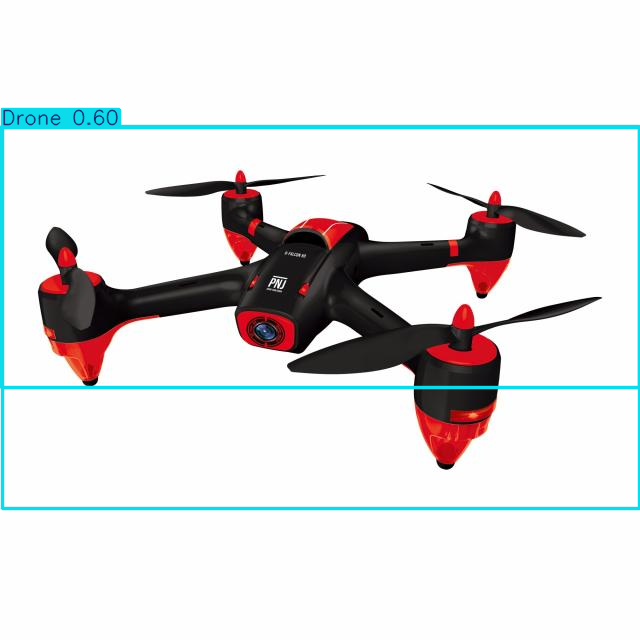

In [17]:
# detecting the object in the test image

result = model('/content/drive/MyDrive/Colab Notebooks/yolov8/Dataset/test/images/00000002_jpg.rf.400f295f0017ec2defa6c4aa473fc4ea.jpg')

result[0].show()


image 1/1 /content/drive/MyDrive/Colab Notebooks/yolov8/Dataset/test/images/BirdsFlying_1546_jpg.rf.e7b0da7ec1501731617c9332323c90a7.jpg: 640x640 1 Bird, 12.0ms
Speed: 2.4ms preprocess, 12.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


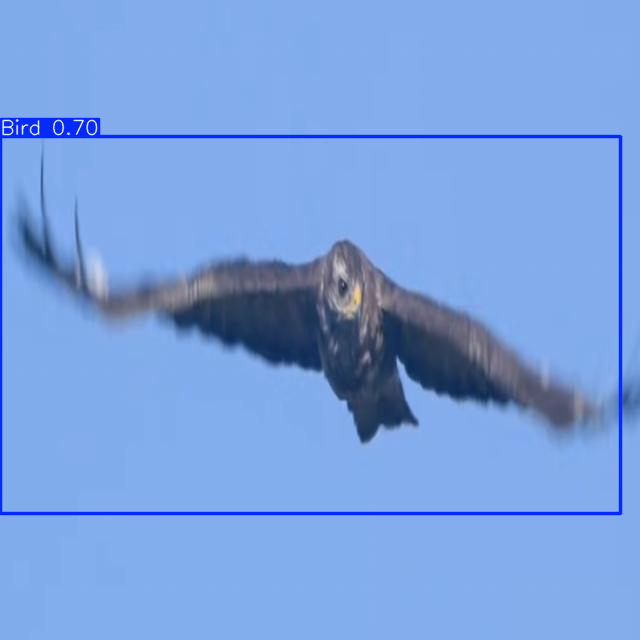

In [18]:
# detecting the object in the test image

result = model('/content/drive/MyDrive/Colab Notebooks/yolov8/Dataset/test/images/BirdsFlying_1546_jpg.rf.e7b0da7ec1501731617c9332323c90a7.jpg')

result[0].show()


image 1/1 /content/drive/MyDrive/Colab Notebooks/yolov8/atest.jpeg: 416x640 1 Bird, 14.1ms
Speed: 2.2ms preprocess, 14.1ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 640)


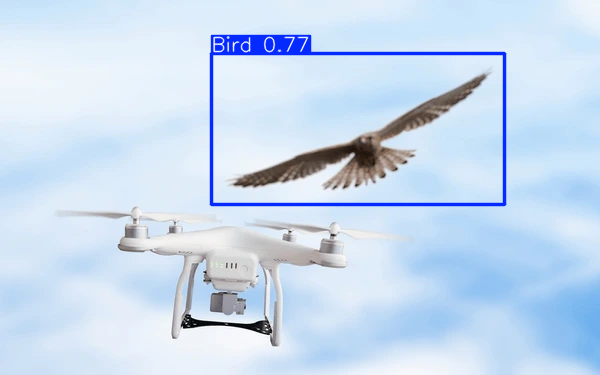

In [19]:
# detecting the object in the test image

result = model('/content/drive/MyDrive/Colab Notebooks/yolov8/atest.jpeg')

result[0].show()

In [20]:
# detecting the object in the test video file

result1 = model('/content/drive/MyDrive/Colab Notebooks/yolov8/Dataset/test/videos/birds_test_video.mp4',save=True)

result2 = model('/content/drive/MyDrive/Colab Notebooks/yolov8/Dataset/test/videos/drone_test_video.mp4',save=True)



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/252) /content/drive/MyDrive/Colab Notebooks/yolov8/Dataset/test/videos/birds_test_video.mp4: 384x640 (no detections), 63.3ms
video 1/1 (frame 2/252) /content/drive/MyDrive/Colab Notebooks/yolov8/Dataset/test/videos/birds_test_video.mp4: 384x640 (no detections), 12.5ms
video 1/1 (frame 3/252) /content/drive/MyDrive/Colab Notebooks/yolov8/Dataset/test/videos/birds_test_video.mp4: 384x640 (no detections), 13.1ms
video 1/1 (frame 4/252) 

# Building yolo11 object detection pretrained model on enhanced dataset having some more augmented images having drone isolations.

### secondary source - https://universe.roboflow.com/cv2/birds-2wpg0/dataset/5



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.2/881.2 kB 54.9 MB/s eta 0:00:00


In [3]:
pip install torch torchvision torchaudio

In [4]:
# importing YOLO
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


## Y11 - Data Processing And Model Training on New Dataset

In [5]:
# loading a pre-trained model

model = YOLO('yolo11n.pt')

100%|██████████| 5.35M/5.35M [00:00<00:00, 377MB/s]


In [6]:
!nvidia-smi

Thu Nov  7 14:37:15 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0              45W / 400W |      2MiB / 40960MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

In [8]:
# train the model

train_results = model.train(
    data = "/content/drive/MyDrive/Colab Notebooks/yolov11/Dataset/data.yaml",
    epochs = 20,
    device = 'cuda:0'
)

Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/drive/MyDrive/Colab Notebooks/yolov11/Dataset/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda:0, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_cr

100%|██████████| 755k/755k [00:00<00:00, 95.0MB/s]


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/drive/MyDrive/Colab Notebooks/yolov11/Dataset/train/labels.cache... 1740 images, 18 backgrounds, 0 corrupt: 100%|██████████| 1740/1740 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/MyDrive/Colab Notebooks/yolov11/Dataset/valid/labels.cache... 106 images, 0 backgrounds, 0 corrupt: 100%|██████████| 106/106 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train2
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      3.15G      1.695      3.304      1.522         30        640: 100%|██████████| 109/109 [02:18<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.87it/s]


                   all        106        142      0.439       0.36      0.344      0.222

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20       2.8G      1.717      2.583      1.539         38        640: 100%|██████████| 109/109 [00:13<00:00,  7.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.37it/s]

                   all        106        142       0.59       0.57      0.586      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      2.97G      1.715      2.192      1.524         28        640: 100%|██████████| 109/109 [00:13<00:00,  8.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.42it/s]

                   all        106        142      0.553      0.565      0.573      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      2.95G      1.674      1.995       1.47         45        640: 100%|██████████| 109/109 [00:13<00:00,  8.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.33it/s]

                   all        106        142      0.559       0.61      0.629      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      2.93G      1.613      1.805      1.459         28        640: 100%|██████████| 109/109 [00:13<00:00,  8.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.52it/s]

                   all        106        142      0.637      0.713      0.713      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      3.26G      1.568      1.694      1.466         24        640: 100%|██████████| 109/109 [00:12<00:00,  8.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.50it/s]

                   all        106        142      0.633      0.655      0.649      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      3.15G      1.486      1.537      1.414         26        640: 100%|██████████| 109/109 [00:12<00:00,  8.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.49it/s]


                   all        106        142      0.651      0.699      0.689      0.447

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      2.94G      1.468      1.468       1.38         32        640: 100%|██████████| 109/109 [00:13<00:00,  8.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.75it/s]

                   all        106        142      0.714      0.674      0.716      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      2.82G      1.457      1.393      1.371         29        640: 100%|██████████| 109/109 [00:13<00:00,  8.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.44it/s]

                   all        106        142      0.817      0.773      0.812      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      2.75G      1.408      1.341      1.342         27        640: 100%|██████████| 109/109 [00:13<00:00,  8.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.48it/s]

                   all        106        142      0.816      0.732      0.784      0.544


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      2.96G      1.326      1.205      1.321         34        640: 100%|██████████| 109/109 [00:14<00:00,  7.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.03it/s]

                   all        106        142      0.803      0.797      0.824      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      2.97G      1.293       1.15      1.298         12        640: 100%|██████████| 109/109 [00:12<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.70it/s]

                   all        106        142      0.858      0.785      0.846      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      3.06G      1.251      1.055      1.255         15        640: 100%|██████████| 109/109 [00:12<00:00,  8.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.05it/s]

                   all        106        142      0.822      0.818      0.881      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      2.93G      1.225     0.9828      1.228         15        640: 100%|██████████| 109/109 [00:13<00:00,  8.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.07it/s]

                   all        106        142       0.91      0.789      0.855      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      2.93G      1.189     0.9386      1.209         23        640: 100%|██████████| 109/109 [00:13<00:00,  8.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.35it/s]

                   all        106        142      0.884      0.819      0.874      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      3.18G      1.143     0.8924      1.197         12        640: 100%|██████████| 109/109 [00:13<00:00,  8.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.52it/s]

                   all        106        142      0.864      0.806      0.853      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      2.92G      1.136     0.8781      1.177         25        640: 100%|██████████| 109/109 [00:12<00:00,  8.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.64it/s]

                   all        106        142      0.887      0.828      0.864      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      2.98G      1.103      0.818      1.154         12        640: 100%|██████████| 109/109 [00:12<00:00,  8.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.92it/s]

                   all        106        142      0.897      0.799      0.865      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      2.94G      1.073     0.7867      1.141         23        640: 100%|██████████| 109/109 [00:12<00:00,  8.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.73it/s]

                   all        106        142      0.898      0.798      0.853      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      2.92G      1.048      0.756      1.123         10        640: 100%|██████████| 109/109 [00:12<00:00,  8.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  9.27it/s]

                   all        106        142      0.906      0.826      0.868      0.644



20 epochs completed in 0.116 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 5.5MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11n summary (fused): 238 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.83it/s]


                   all        106        142      0.898      0.797      0.853      0.647
                  Bird         47         80      0.821       0.95      0.875      0.648
                 Drone         59         62      0.976      0.644      0.831      0.647
Speed: 0.1ms preprocess, 0.7ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/train2


## Y11 - Evaluation of the model trained using New dataset

In [9]:
# loading the best pretrained model

model = YOLO("/content/runs/detect/train2/weights/best.pt")

In [10]:
# Validate the model

metrics = model.val()
metrics.box.map  # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps  # a list contains map50-95 of each category

Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11n summary (fused): 238 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning /content/drive/MyDrive/Colab Notebooks/yolov11/Dataset/valid/labels.cache... 106 images, 0 backgrounds, 0 corrupt: 100%|██████████| 106/106 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.29it/s]


                   all        106        142      0.896      0.798      0.852      0.647
                  Bird         47         80      0.821       0.95      0.874      0.645
                 Drone         59         62       0.97      0.645      0.831      0.648
Speed: 0.2ms preprocess, 2.6ms inference, 0.0ms loss, 4.8ms postprocess per image
Results saved to runs/detect/val


array([    0.64518,     0.64659,       0.648])

In [12]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

!pip install YOLOv8-Explainer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 23.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for grad-cam: filename=grad_cam-1.4.8-py3-none-any.whl size=38243 sha256=d29e16ca197479781b2bce44a6f5259441bf6d8fb01059f000e6189455e7baec
  Stored in directory: /root/.cache/pip/wheels/f8/04/36/94ff3c8a4215826a21946b34c01180817e606989fdf53f7cd6
Successfully built grad-cam


YOLO11n summary: 319 layers, 2,590,425 parameters, 0 gradients, 6.4 GFLOPs


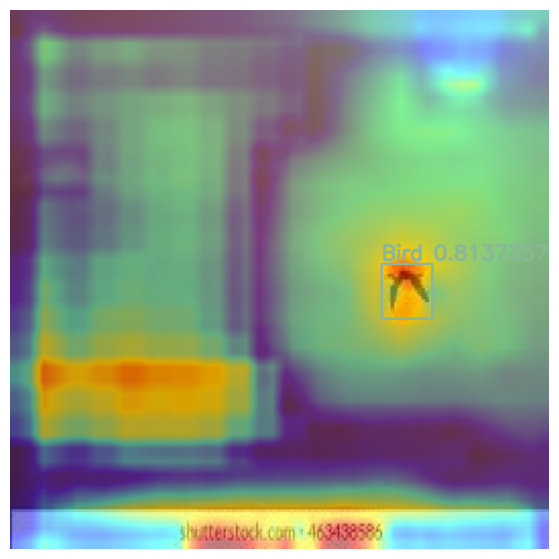

In [13]:

from YOLOv8_Explainer import yolov8_heatmap, display_images

model = yolov8_heatmap(
    weight="/content/runs/detect/train2/weights/best.pt",
        conf_threshold=0.4,
        method = "EigenCAM"
)

imagelist = model(
    img_path="/content/drive/MyDrive/Colab Notebooks/yolov11/Dataset/test/images/singleBirdinsky361_jpeg.rf.ed4d1d9841d8048707bebed278e561c2.jpg",
    )

display_images(imagelist)



YOLO11n summary: 319 layers, 2,590,425 parameters, 0 gradients, 6.4 GFLOPs


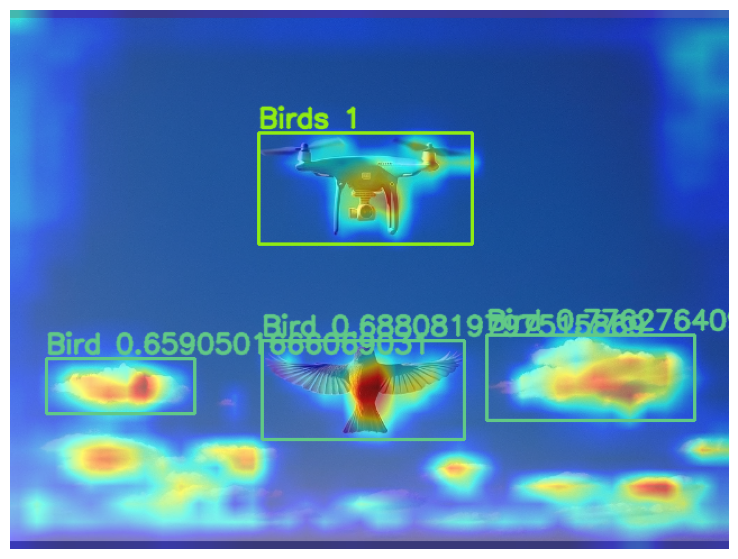

In [15]:
model = yolov8_heatmap(
    weight="/content/runs/detect/train2/weights/best.pt",
        conf_threshold=0.4,
        method = "GradCAM"
)


imagelist = model(
    img_path="/content/drive/MyDrive/Colab Notebooks/yolov11/btest.jpeg",
    )

display_images(imagelist)


## Y11 - Metrics and Benchmarking of the model trained using New dataset

In [17]:
from ultralytics.utils.benchmarks import benchmark

In [18]:
# Loading the custom model

model = YOLO('/content/runs/detect/train2/weights/best.pt')

benchmark(model=model,
          data="/content/drive/MyDrive/Colab Notebooks/yolov11/Dataset/test/images", imgsz=640, device=0)


Setup complete ✅ (12 CPUs, 83.5 GB RAM, 39.1/235.7 GB disk)

Benchmarks complete for best.pt on /content/drive/MyDrive/Colab Notebooks/yolov11/Dataset/test/images at imgsz=640 (537.73s)
                   Format Status❔  Size (MB) metrics/mAP50-95(B) Inference time (ms/im)   FPS
0                 PyTorch       ❎        5.2                None                   None  None
1             TorchScript       ❎       10.4                None                   None  None
2                    ONNX       ❎       10.1                None                   None  None
3                OpenVINO       ❌        0.0                None                   None  None
4                TensorRT       ❎       12.5                None                   None  None
5                  CoreML       ❌        0.0                None                   None  None
6   TensorFlow SavedModel       ❎       25.5                None                   None  None
7     TensorFlow GraphDef       ❎       10.2                No

Format Status❔  Size (MB) metrics/mAP50-95(B) Inference time (ms/im)   FPS
0                 PyTorch       ❎        5.2                None                   None  None
1             TorchScript       ❎       10.4                None                   None  None
2                    ONNX       ❎       10.1                None                   None  None
3                OpenVINO       ❌        0.0                None                   None  None
4                TensorRT       ❎       12.5                None                   None  None
5                  CoreML       ❌        0.0                None                   None  None
6   TensorFlow SavedModel       ❎       25.5                None                   None  None
7     TensorFlow GraphDef       ❎       10.2                None                   None  None
8         TensorFlow Lite       ❌        0.0                None                   None  None
9     TensorFlow Edge TPU       ❌        0.0                None                   None  None
10          TensorFlow.js       ❌        0.0                None                   None  None
11           PaddlePaddle       ❎       20.2                None                   None  None
12                    MNN       ❎       10.0                None                   None  None
13                   NCNN       ❎       10.0                None                   None  None

## Y11 - Prediction of the model trained using New dataset


image 1/1 /content/drive/MyDrive/Colab Notebooks/yolov11/Dataset/test/images/singleBirdinsky351_jpeg.rf.206b14d81e37f37a269afbdcdbc4eba5.jpg: 640x640 1 Bird, 13.0ms
Speed: 2.5ms preprocess, 13.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


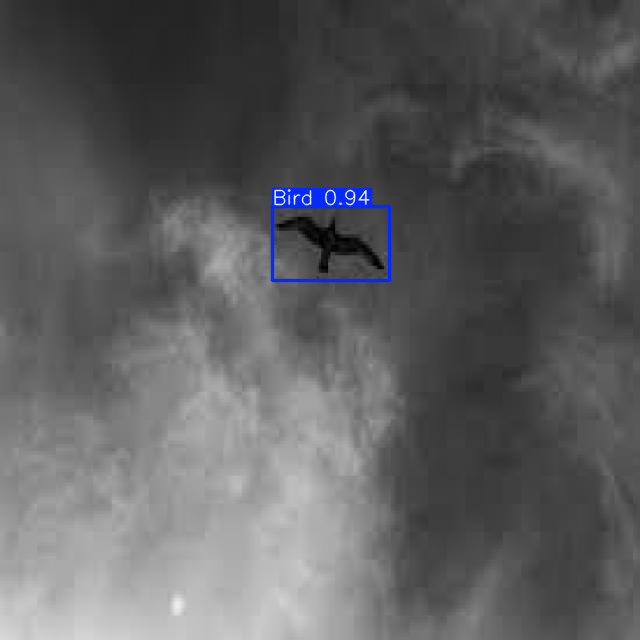

In [19]:
# detecting the object in the test image

result = model('/content/drive/MyDrive/Colab Notebooks/yolov11/Dataset/test/images/singleBirdinsky351_jpeg.rf.206b14d81e37f37a269afbdcdbc4eba5.jpg')

result[0].show()


image 1/1 /content/drive/MyDrive/Colab Notebooks/yolov11/Dataset/test/images/singleBirdinsky390_jpeg.rf.a5102b5b3954c1266efcce349a6cb456.jpg: 640x640 1 Bird, 13.5ms
Speed: 2.9ms preprocess, 13.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


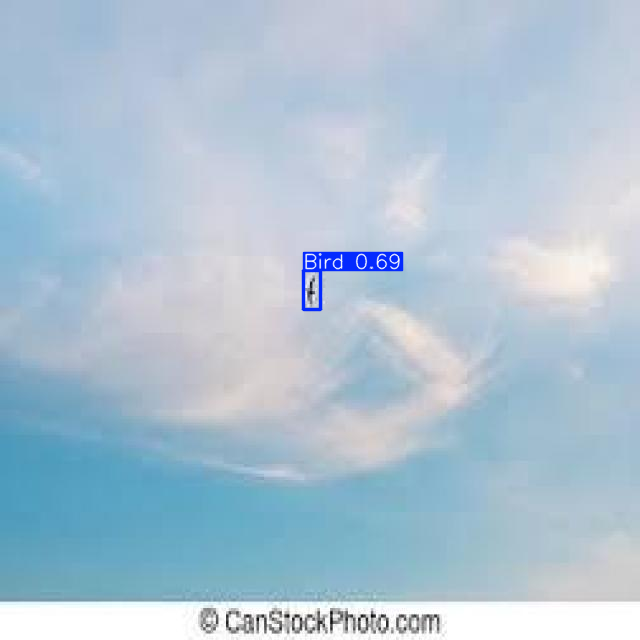

In [24]:
# detecting the object in the test image

result = model('/content/drive/MyDrive/Colab Notebooks/yolov11/Dataset/test/images/singleBirdinsky390_jpeg.rf.a5102b5b3954c1266efcce349a6cb456.jpg')

result[0].show()


image 1/1 /content/drive/MyDrive/Colab Notebooks/yolov11/Dataset/test/images/singleBirdinsky352_jpeg.rf.4613efae50a748f5205ec0dad0b21a5a.jpg: 640x640 6 Birds, 12.1ms
Speed: 2.4ms preprocess, 12.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


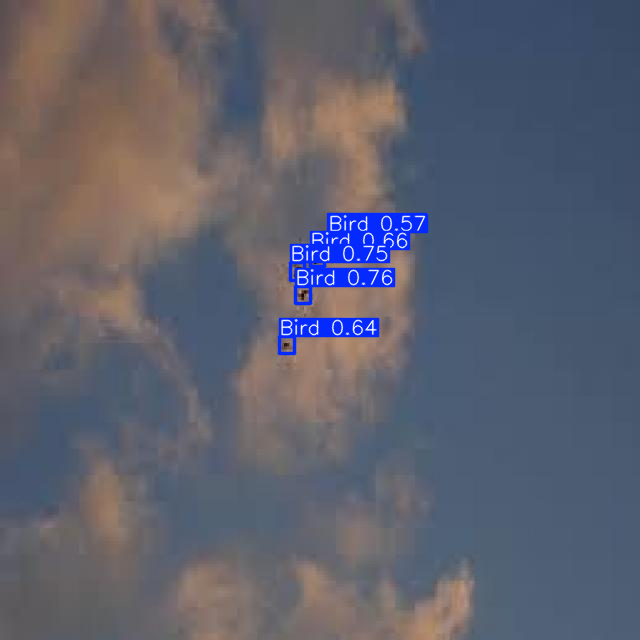

In [27]:
# detecting the object in the test image

result = model('/content/drive/MyDrive/Colab Notebooks/yolov11/Dataset/test/images/singleBirdinsky352_jpeg.rf.4613efae50a748f5205ec0dad0b21a5a.jpg')

result[0].show()


image 1/1 /content/drive/MyDrive/Colab Notebooks/yolov11/Dataset/test/images/singleDronesinsky381_jpeg.rf.5e1cb94806fe869aaf9a3744279e2f38.jpg: 640x640 1 Drone, 11.4ms
Speed: 2.1ms preprocess, 11.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


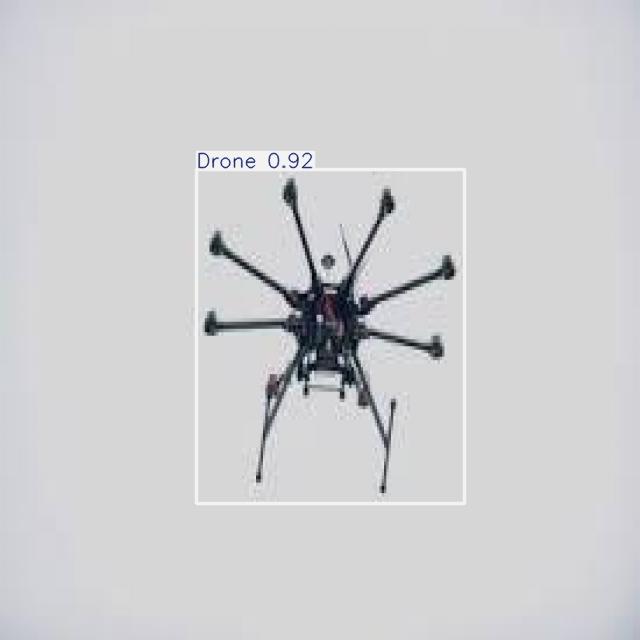

In [20]:
# detecting the object in the test image

result = model('/content/drive/MyDrive/Colab Notebooks/yolov11/Dataset/test/images/singleDronesinsky381_jpeg.rf.5e1cb94806fe869aaf9a3744279e2f38.jpg')

result[0].show()


image 1/1 /content/drive/MyDrive/Colab Notebooks/yolov11/Dataset/test/images/yoto02872_png.rf.d4e5f68d5b21e652b2ed82af7d741d29.jpg: 640x640 1 Drone, 15.0ms
Speed: 2.5ms preprocess, 15.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


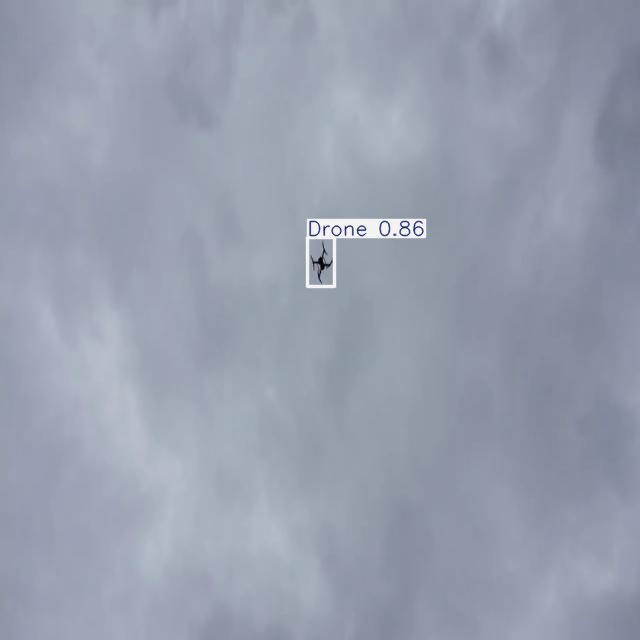

In [21]:
# detecting the object in the test image

result = model('/content/drive/MyDrive/Colab Notebooks/yolov11/Dataset/test/images/yoto02872_png.rf.d4e5f68d5b21e652b2ed82af7d741d29.jpg')

result[0].show()


image 1/1 /content/drive/MyDrive/Colab Notebooks/yolov11/Dataset/test/images/video18_1266_JPEG.rf.1cae89b932ca079fb1e46b3e212e61f6.jpg: 640x640 2 Drones, 11.1ms
Speed: 2.0ms preprocess, 11.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


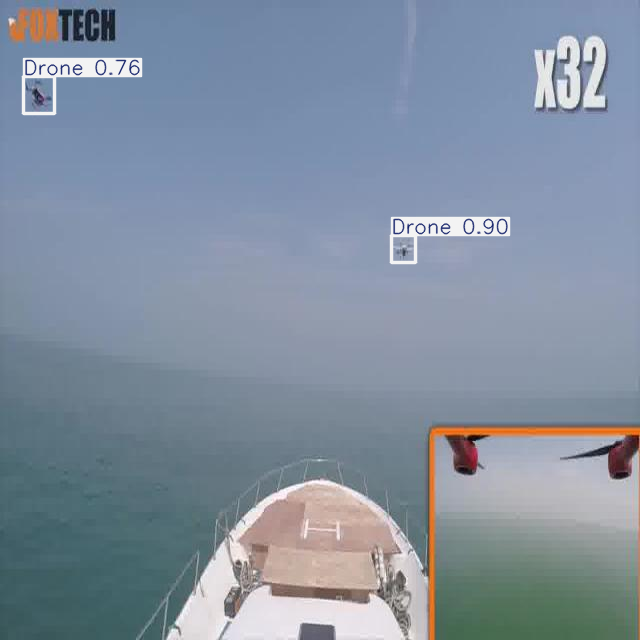

In [23]:
# detecting the object in the test image

result = model('/content/drive/MyDrive/Colab Notebooks/yolov11/Dataset/test/images/video18_1266_JPEG.rf.1cae89b932ca079fb1e46b3e212e61f6.jpg')

result[0].show()

In [6]:
# detecting the object in the test video file

result1 = model('/content/drive/MyDrive/Colab Notebooks/yolov11/Dataset/test/videos/birds_test_video.mp4',save=True)

result2 = model('/content/drive/MyDrive/Colab Notebooks/yolov11/Dataset/test/videos/drone_test_video.mp4',save=True)



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/252) /content/drive/MyDrive/Colab Notebooks/yolov11/Dataset/test/videos/birds_test_video.mp4: 384x640 3 Birds, 1 Drone, 56.3ms
video 1/1 (frame 2/252) /content/drive/MyDrive/Colab Notebooks/yolov11/Dataset/test/videos/birds_test_video.mp4: 384x640 4 Birds, 1 Drone, 11.1ms
video 1/1 (frame 3/252) /content/drive/MyDrive/Colab Notebooks/yolov11/Dataset/test/videos/birds_test_video.mp4: 384x640 1 Bird, 1 Drone, 10.7ms
video 1/1 (frame 4/

In [7]:
result3 = model('/content/drive/MyDrive/Colab Notebooks/yolov11/Dataset/test/videos/drone_test_video2.mp4',save=True)



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/336) /content/drive/MyDrive/Colab Notebooks/yolov11/Dataset/test/videos/drone_test_video2.mp4: 352x640 (no detections), 57.9ms
video 1/1 (frame 2/336) /content/drive/MyDrive/Colab Notebooks/yolov11/Dataset/test/videos/drone_test_video2.mp4: 352x640 (no detections), 11.0ms
video 1/1 (frame 3/336) /content/drive/MyDrive/Colab Notebooks/yolov11/Dataset/test/videos/drone_test_video2.mp4: 352x640 (no detections), 10.7ms
video 1/1 (frame 4

Y11-Object Tracking

In [4]:
model = YOLO('/content/drive/MyDrive/Colab Notebooks/yolov11/runs/detect/train/weights/best.pt')

results = model.track(source='/content/drive/MyDrive/Colab Notebooks/yolov11/Dataset/test/videos/birds_test_video2.mp4',show=True,save=True)

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/304) /content/drive/MyDrive/Colab Notebooks/yolov11/Dataset/test/videos/birds_test_video2.mp4: 384x640 4 Birds, 56.8ms
video 1/1 (frame 2/304) /content/drive/MyDrive/Colab Notebooks/yolov11/Dataset/test/videos/birds_test_video2.mp4: 384x640 4 Birds, 10.7ms
video 1/1 (frame 3/304) /content/drive/MyDrive/Colab Notebooks/yolov11/Dataset/test/videos/birds_test_vide

## Y11 - Model Compression & Inference Optimization

In [5]:
import torch
from ultralytics import YOLO

print(torch.cuda.is_available())

device = torch.device('cuda:0')

# Load the model using Ultralytics' API
model = YOLO("/content/drive/MyDrive/Colab Notebooks/yolov11/runs/detect/train/weights/best.pt").to(device)

# Set the model to evaluation mode
model.eval()

# Export the model to PaddlePaddle format
model.export(format="paddle")



True
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/Colab Notebooks/yolov11/runs/detect/train/weights/best.pt, data=/content/drive/MyDrive/Colab Notebooks/yolov11/Dataset/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda:0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_label

100%|██████████| 755k/755k [00:00<00:00, 122MB/s]



                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

100%|██████████| 5.35M/5.35M [00:00<00:00, 342MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/Colab Notebooks/yolov11/Dataset/train/labels.cache... 1740 images, 18 backgrounds, 0 corrupt: 100%|██████████| 1740/1740 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/MyDrive/Colab Notebooks/yolov11/Dataset/valid/labels.cache... 106 images, 0 backgrounds, 0 corrupt: 100%|██████████| 106/106 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      3.15G      1.217      1.078       1.22         30        640: 100%|██████████| 109/109 [00:38<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.83it/s]


                   all        106        142       0.84      0.746      0.795      0.551

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.82G      1.332      1.131      1.278         38        640: 100%|██████████| 109/109 [00:13<00:00,  8.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.09it/s]


                   all        106        142      0.789      0.702      0.792      0.535

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.98G      1.404      1.239      1.325         28        640: 100%|██████████| 109/109 [00:13<00:00,  8.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.97it/s]

                   all        106        142      0.725      0.736      0.763      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.97G      1.427      1.259      1.324         45        640: 100%|██████████| 109/109 [00:13<00:00,  8.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.21it/s]

                   all        106        142      0.849      0.641       0.76      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.95G       1.41      1.275      1.331         28        640: 100%|██████████| 109/109 [00:13<00:00,  8.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.13it/s]


                   all        106        142      0.795      0.725       0.78      0.495

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      3.27G      1.398      1.273      1.341         24        640: 100%|██████████| 109/109 [00:12<00:00,  8.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.34it/s]


                   all        106        142      0.756      0.673      0.669      0.448

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      3.15G      1.352      1.226      1.313         26        640: 100%|██████████| 109/109 [00:13<00:00,  8.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.57it/s]

                   all        106        142      0.793      0.817      0.836      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.96G      1.347      1.177      1.305         32        640: 100%|██████████| 109/109 [00:13<00:00,  8.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.76it/s]

                   all        106        142      0.827      0.792      0.817      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.85G      1.366      1.177      1.308         29        640: 100%|██████████| 109/109 [00:13<00:00,  8.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.44it/s]


                   all        106        142      0.727      0.763      0.783      0.506

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.77G      1.335      1.159      1.297         27        640: 100%|██████████| 109/109 [00:12<00:00,  8.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.29it/s]

                   all        106        142      0.809      0.764      0.806      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.77G      1.355      1.151      1.296         17        640: 100%|██████████| 109/109 [00:13<00:00,  8.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.36it/s]

                   all        106        142       0.78      0.662      0.767      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.98G      1.352      1.167      1.293         37        640: 100%|██████████| 109/109 [00:12<00:00,  8.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.08it/s]

                   all        106        142      0.832      0.816      0.861      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.84G      1.345      1.119      1.301         31        640: 100%|██████████| 109/109 [00:12<00:00,  8.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.55it/s]

                   all        106        142      0.755      0.745      0.751        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.95G      1.335      1.121      1.298         27        640: 100%|██████████| 109/109 [00:13<00:00,  8.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.14it/s]


                   all        106        142      0.792      0.761      0.797      0.535

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      3.21G       1.33      1.087      1.261         55        640: 100%|██████████| 109/109 [00:13<00:00,  8.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.01it/s]

                   all        106        142      0.837      0.804      0.875      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      3.39G      1.315      1.079      1.256         22        640: 100%|██████████| 109/109 [00:13<00:00,  8.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.37it/s]

                   all        106        142      0.833       0.85      0.843      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      3.01G      1.292       1.07      1.244         56        640: 100%|██████████| 109/109 [00:13<00:00,  8.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.87it/s]

                   all        106        142      0.853      0.809      0.864      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.97G      1.257      1.049      1.241         44        640: 100%|██████████| 109/109 [00:12<00:00,  8.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.44it/s]

                   all        106        142      0.819      0.818      0.805      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.79G      1.258      1.011      1.252         48        640: 100%|██████████| 109/109 [00:13<00:00,  8.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.50it/s]

                   all        106        142      0.846      0.862      0.887      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100       2.8G      1.268     0.9959      1.244         42        640: 100%|██████████| 109/109 [00:13<00:00,  8.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.50it/s]

                   all        106        142      0.849      0.825      0.841      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.61G      1.231     0.9717      1.229         59        640: 100%|██████████| 109/109 [00:13<00:00,  8.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.00it/s]


                   all        106        142      0.876      0.804      0.852      0.604

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.63G      1.217      1.016      1.242         31        640: 100%|██████████| 109/109 [00:13<00:00,  8.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.65it/s]

                   all        106        142      0.807      0.819       0.82      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.73G      1.242     0.9759       1.23         21        640: 100%|██████████| 109/109 [00:13<00:00,  8.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.88it/s]

                   all        106        142      0.843      0.805      0.853      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.79G      1.225     0.9754      1.229         43        640: 100%|██████████| 109/109 [00:12<00:00,  8.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.01it/s]

                   all        106        142      0.859      0.857      0.887      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      3.18G      1.226     0.9878       1.22         22        640: 100%|██████████| 109/109 [00:12<00:00,  8.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.08it/s]

                   all        106        142      0.836      0.844      0.843      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      3.37G      1.202     0.9401      1.207         23        640: 100%|██████████| 109/109 [00:13<00:00,  8.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.48it/s]

                   all        106        142      0.795      0.774      0.824      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100         3G       1.22     0.9564      1.236         22        640: 100%|██████████| 109/109 [00:13<00:00,  8.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.56it/s]

                   all        106        142      0.799      0.814      0.794      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.95G      1.229     0.9443      1.216         41        640: 100%|██████████| 109/109 [00:13<00:00,  8.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.75it/s]


                   all        106        142      0.864      0.802      0.837      0.606

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.84G      1.168     0.9105      1.193         15        640: 100%|██████████| 109/109 [00:13<00:00,  8.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.65it/s]

                   all        106        142      0.858      0.718      0.813      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.94G      1.162     0.9032      1.176         24        640: 100%|██████████| 109/109 [00:12<00:00,  8.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.69it/s]

                   all        106        142      0.935      0.868      0.909      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.98G      1.176     0.8871        1.2         22        640: 100%|██████████| 109/109 [00:13<00:00,  8.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.23it/s]

                   all        106        142      0.869      0.809      0.841      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.64G      1.184     0.9059      1.197         25        640: 100%|██████████| 109/109 [00:13<00:00,  8.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.50it/s]

                   all        106        142      0.877      0.893      0.906      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      3.07G      1.156     0.8793      1.177         26        640: 100%|██████████| 109/109 [00:13<00:00,  8.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.95it/s]

                   all        106        142      0.848      0.787      0.817      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.84G      1.145     0.8757      1.179         19        640: 100%|██████████| 109/109 [00:13<00:00,  8.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.43it/s]

                   all        106        142      0.903      0.835      0.906      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.81G      1.171     0.8853      1.173         38        640: 100%|██████████| 109/109 [00:13<00:00,  8.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.99it/s]

                   all        106        142      0.887      0.864      0.915      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.75G      1.137     0.8624      1.188         24        640: 100%|██████████| 109/109 [00:12<00:00,  8.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.93it/s]

                   all        106        142      0.796      0.812      0.828      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.96G       1.14     0.8737      1.164         36        640: 100%|██████████| 109/109 [00:13<00:00,  8.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.55it/s]

                   all        106        142      0.811      0.747       0.83      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      3.04G      1.129     0.8331       1.17         22        640: 100%|██████████| 109/109 [00:13<00:00,  8.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.69it/s]

                   all        106        142      0.901      0.849      0.889      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.79G      1.127      0.847      1.172        135        640: 100%|██████████| 109/109 [00:13<00:00,  8.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  9.11it/s]

                   all        106        142      0.834      0.824      0.829      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.64G      1.134     0.8414      1.162         36        640: 100%|██████████| 109/109 [00:13<00:00,  8.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.08it/s]

                   all        106        142      0.905      0.843      0.908      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.95G      1.114     0.8413      1.161         19        640: 100%|██████████| 109/109 [00:12<00:00,  8.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.73it/s]

                   all        106        142      0.853      0.733      0.789      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.68G      1.101     0.8203       1.15         20        640: 100%|██████████| 109/109 [00:13<00:00,  8.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.50it/s]

                   all        106        142      0.853      0.847      0.869       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      3.02G      1.117     0.8178      1.151         33        640: 100%|██████████| 109/109 [00:13<00:00,  8.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.61it/s]

                   all        106        142      0.866      0.856      0.847      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.96G      1.096     0.8162       1.14         21        640: 100%|██████████| 109/109 [00:13<00:00,  8.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.84it/s]

                   all        106        142      0.888      0.886      0.913      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.68G      1.082     0.8175      1.151         21        640: 100%|██████████| 109/109 [00:13<00:00,  8.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.52it/s]

                   all        106        142      0.751      0.772       0.81      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.97G       1.09     0.8299      1.161         26        640: 100%|██████████| 109/109 [00:13<00:00,  8.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.17it/s]

                   all        106        142      0.895      0.773      0.836      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.61G      1.056     0.7978      1.139         24        640: 100%|██████████| 109/109 [00:13<00:00,  8.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.76it/s]

                   all        106        142      0.869      0.818      0.864      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.98G      1.044     0.7817      1.118         21        640: 100%|██████████| 109/109 [00:12<00:00,  8.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.40it/s]

                   all        106        142      0.913      0.825      0.886      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.94G      1.048     0.7656      1.119         42        640: 100%|██████████| 109/109 [00:12<00:00,  8.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.24it/s]

                   all        106        142      0.905      0.842      0.869      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100         3G      1.033     0.7704      1.123         30        640: 100%|██████████| 109/109 [00:13<00:00,  8.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.77it/s]

                   all        106        142      0.879      0.819      0.854      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      3.28G       1.09     0.7664      1.119         21        640: 100%|██████████| 109/109 [00:13<00:00,  8.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.54it/s]

                   all        106        142      0.852      0.811      0.862      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      3.04G      1.044     0.7586       1.12         41        640: 100%|██████████| 109/109 [00:13<00:00,  8.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.11it/s]

                   all        106        142      0.873      0.811      0.867      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.76G      1.048     0.7612      1.116         24        640: 100%|██████████| 109/109 [00:13<00:00,  8.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.61it/s]


                   all        106        142      0.868      0.841      0.859      0.607

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.79G      1.033     0.7421      1.119         28        640: 100%|██████████| 109/109 [00:12<00:00,  8.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.79it/s]

                   all        106        142      0.892      0.826      0.889      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.93G      1.047     0.7689      1.117         36        640: 100%|██████████| 109/109 [00:12<00:00,  8.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.93it/s]

                   all        106        142       0.83      0.842      0.862      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.96G      1.054     0.7712      1.123         24        640: 100%|██████████| 109/109 [00:13<00:00,  8.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.44it/s]

                   all        106        142      0.846      0.863      0.876      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.92G      1.005     0.7386      1.114         24        640: 100%|██████████| 109/109 [00:13<00:00,  8.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.88it/s]

                   all        106        142      0.829      0.834      0.871      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.93G      1.006     0.7138      1.088         20        640: 100%|██████████| 109/109 [00:13<00:00,  8.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.88it/s]

                   all        106        142      0.902      0.909      0.929      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      3.17G      1.003     0.7126      1.113         21        640: 100%|██████████| 109/109 [00:13<00:00,  8.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.64it/s]

                   all        106        142      0.896      0.874      0.898      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.83G     0.9991     0.7185      1.096         52        640: 100%|██████████| 109/109 [00:12<00:00,  8.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.50it/s]

                   all        106        142      0.922      0.809      0.879      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.98G      1.015     0.7166      1.096         17        640: 100%|██████████| 109/109 [00:12<00:00,  8.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.11it/s]

                   all        106        142      0.871      0.811      0.854      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.98G      1.019      0.751      1.103         42        640: 100%|██████████| 109/109 [00:13<00:00,  8.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.51it/s]

                   all        106        142      0.882      0.865      0.889      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.65G      1.004     0.7281      1.101         21        640: 100%|██████████| 109/109 [00:13<00:00,  8.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.38it/s]

                   all        106        142      0.895       0.82      0.879      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.93G      1.012     0.7237      1.102         25        640: 100%|██████████| 109/109 [00:13<00:00,  8.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.95it/s]

                   all        106        142      0.858       0.86      0.894      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      3.06G     0.9758     0.6964      1.085         17        640: 100%|██████████| 109/109 [00:13<00:00,  8.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.69it/s]

                   all        106        142      0.868      0.854      0.897      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      3.41G     0.9856     0.6889      1.081         24        640: 100%|██████████| 109/109 [00:13<00:00,  8.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.63it/s]

                   all        106        142      0.907      0.842      0.894       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.97G     0.9735     0.7079      1.083         99        640: 100%|██████████| 109/109 [00:12<00:00,  8.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.32it/s]

                   all        106        142      0.917      0.866      0.894      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.98G     0.9787     0.6999      1.086         15        640: 100%|██████████| 109/109 [00:13<00:00,  8.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.83it/s]

                   all        106        142       0.89      0.801       0.89      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      3.02G     0.9563     0.6958      1.079         20        640: 100%|██████████| 109/109 [00:13<00:00,  8.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.89it/s]

                   all        106        142      0.936      0.876      0.915      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100       3.2G     0.9651     0.6796      1.067         27        640: 100%|██████████| 109/109 [00:13<00:00,  8.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.54it/s]

                   all        106        142      0.877       0.85       0.88      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      3.02G     0.9581     0.6816      1.074         41        640: 100%|██████████| 109/109 [00:13<00:00,  8.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.21it/s]

                   all        106        142      0.931       0.87      0.902      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.77G     0.9437     0.6724      1.079         27        640: 100%|██████████| 109/109 [00:13<00:00,  8.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.10it/s]

                   all        106        142      0.917      0.875      0.901      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.77G     0.9232      0.674      1.066         14        640: 100%|██████████| 109/109 [00:12<00:00,  8.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.53it/s]

                   all        106        142      0.926      0.845      0.885      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.83G     0.9415     0.6728      1.074         21        640: 100%|██████████| 109/109 [00:13<00:00,  8.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.35it/s]


                   all        106        142      0.894      0.816      0.852      0.615

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.77G     0.9288      0.663      1.062         18        640: 100%|██████████| 109/109 [00:13<00:00,  8.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.64it/s]

                   all        106        142      0.928      0.839      0.893      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100       2.8G     0.9414     0.6559      1.057         33        640: 100%|██████████| 109/109 [00:13<00:00,  8.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  9.14it/s]


                   all        106        142      0.891      0.864      0.875      0.634

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.73G     0.8911     0.6316      1.051         22        640: 100%|██████████| 109/109 [00:13<00:00,  8.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.32it/s]

                   all        106        142      0.903      0.836       0.86      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.99G     0.9229     0.6496      1.065         32        640: 100%|██████████| 109/109 [00:12<00:00,  8.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.01it/s]

                   all        106        142      0.948      0.877      0.929      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.94G     0.8988     0.6392      1.052         35        640: 100%|██████████| 109/109 [00:12<00:00,  8.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.16it/s]

                   all        106        142      0.958        0.9      0.913      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.61G     0.9182     0.6515      1.058         37        640: 100%|██████████| 109/109 [00:13<00:00,  8.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.66it/s]

                   all        106        142      0.896      0.846      0.864      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.59G     0.8692     0.6338      1.053         24        640: 100%|██████████| 109/109 [00:13<00:00,  8.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.75it/s]


                   all        106        142      0.914      0.886      0.899      0.646

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.88G     0.8794     0.6196      1.042         39        640: 100%|██████████| 109/109 [00:13<00:00,  8.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.73it/s]


                   all        106        142      0.906      0.828      0.885      0.628

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      3.09G     0.9254      0.641      1.049         20        640: 100%|██████████| 109/109 [00:13<00:00,  8.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.71it/s]


                   all        106        142      0.929      0.825      0.895      0.628

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.98G      0.893     0.6264      1.041         22        640: 100%|██████████| 109/109 [00:13<00:00,  8.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.27it/s]

                   all        106        142      0.916      0.871      0.899      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.94G     0.8757     0.6279       1.04         42        640: 100%|██████████| 109/109 [00:13<00:00,  8.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.79it/s]

                   all        106        142      0.928      0.854      0.885      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.84G     0.8598     0.6194      1.038         16        640: 100%|██████████| 109/109 [00:12<00:00,  8.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.02it/s]

                   all        106        142      0.937      0.884        0.9      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      3.02G     0.8853     0.6231      1.031         34        640: 100%|██████████| 109/109 [00:13<00:00,  8.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.48it/s]

                   all        106        142      0.932      0.805      0.881      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.81G     0.8735     0.6164      1.027         46        640: 100%|██████████| 109/109 [00:13<00:00,  8.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.66it/s]

                   all        106        142      0.905      0.865        0.9      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.79G     0.8826     0.6176      1.044         23        640: 100%|██████████| 109/109 [00:13<00:00,  8.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.97it/s]

                   all        106        142      0.934      0.854      0.903      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.96G     0.8359     0.6028      1.029         24        640: 100%|██████████| 109/109 [00:13<00:00,  8.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.31it/s]

                   all        106        142      0.894      0.889       0.91      0.665


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.97G     0.7801     0.5033     0.9763         27        640: 100%|██████████| 109/109 [00:13<00:00,  7.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.05it/s]

                   all        106        142      0.919       0.86      0.884      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100       3.1G     0.7634     0.4884     0.9713         11        640: 100%|██████████| 109/109 [00:12<00:00,  8.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.86it/s]

                   all        106        142      0.911      0.859        0.9      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      3.07G     0.7595     0.4834     0.9653         11        640: 100%|██████████| 109/109 [00:12<00:00,  8.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.26it/s]

                   all        106        142      0.923      0.836      0.888      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.98G     0.7498     0.4809     0.9627         23        640: 100%|██████████| 109/109 [00:13<00:00,  8.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.87it/s]


                   all        106        142      0.899      0.881      0.907      0.657

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.93G     0.7313     0.4704      0.949         24        640: 100%|██████████| 109/109 [00:13<00:00,  8.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.42it/s]

                   all        106        142       0.93       0.85      0.904      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.93G     0.7458     0.4722     0.9613         16        640: 100%|██████████| 109/109 [00:12<00:00,  8.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.87it/s]

                   all        106        142      0.889      0.884      0.898      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.86G     0.7315     0.4682     0.9622         12        640: 100%|██████████| 109/109 [00:12<00:00,  8.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.41it/s]

                   all        106        142      0.894      0.876      0.886       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.82G     0.7302     0.4636     0.9503         12        640: 100%|██████████| 109/109 [00:12<00:00,  8.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.79it/s]

                   all        106        142      0.922       0.87        0.9      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      3.03G     0.7246     0.4613     0.9508         14        640: 100%|██████████| 109/109 [00:12<00:00,  8.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.59it/s]

                   all        106        142      0.912      0.878      0.898       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.92G      0.729     0.4689     0.9556         23        640: 100%|██████████| 109/109 [00:12<00:00,  8.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.52it/s]

                   all        106        142       0.93      0.875      0.899      0.656



100 epochs completed in 0.404 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11n summary (fused): 238 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.64it/s]


                   all        106        142      0.949      0.877      0.929      0.676
                  Bird         47         80      0.926      0.932      0.954      0.647
                 Drone         59         62      0.972      0.823      0.903      0.705
Speed: 0.1ms preprocess, 0.8ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/train
Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
YOLO11n summary (fused): 238 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs

PyTorch: starting from 'runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 7, 8400) (5.2 MB)
requirements: Ultralytics requirements ['paddlepaddle', 'x2paddle'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 MB 103.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 269.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322

'runs/detect/train/weights/best_paddle_model'

In [6]:
# Load the exported PaddlePaddle model
paddle_model = YOLO("/content/runs/detect/train/weights/best_paddle_model/inference_model/model.pdmodel")

In [8]:
# Run inference
results = paddle_model("/content/drive/MyDrive/Colab Notebooks/yolov11/atest.jpeg")



Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)


TypeError: model='/content/runs/detect/train/weights/best_paddle_model/inference_model/model.pdmodel' is not a supported model format. Ultralytics supports: ('PyTorch', 'TorchScript', 'ONNX', 'OpenVINO', 'TensorRT', 'CoreML', 'TensorFlow SavedModel', 'TensorFlow GraphDef', 'TensorFlow Lite', 'TensorFlow Edge TPU', 'TensorFlow.js', 'PaddlePaddle', 'MNN', 'NCNN')
See https://docs.ultralytics.com/modes/predict for help.